# Исследование объявлений о продаже квартир

Исходные данные: данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. На основании параметров и характеристик объектов недвижимости необходимо научиться производить оценку их рыночной стоимости.
По каждой квартире на продажу доступны два вида данных. Первые - данные ручного ввода (вписаны пользователем), вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

## Ознакомление с предоставленными данными

In [2]:
df = pd.read_csv(r'C:\Users\lebeda\Yandex_Practicum\Yandex_projects\data_sets\prjkt_3(sp5)\real_estate_data.csv', sep='\t') 


In [3]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Согласно пердложенному описанию данных таблица отображает следующую информацию (по колонкам соответсвенно):

    airports_nearest — расстояние до ближайшего аэропорта в метрах (м);
    balcony — число балконов;
    ceiling_height — высота потолков (м);
    cityCenters_nearest — расстояние до центра города (м);
    days_exposition — сколько дней было размещено объявление (от публикации до снятия);
    first_day_exposition — дата публикации;
    floor — этаж;
    floors_total — всего этажей в доме;
    is_apartment — апартаменты (булев тип);
    kitchen_area — площадь кухни в квадратных метрах (м²);
    last_price — цена на момент снятия с публикации;
    living_area — жилая площадь в квадратных метрах (м²);
    locality_name — название населённого пункта;
    open_plan — свободная планировка (булев тип);
    parks_around3000 — число парков в радиусе 3 км;
    parks_nearest — расстояние до ближайшего парка (м);
    ponds_around3000 — число водоёмов в радиусе 3 км;
    ponds_nearest — расстояние до ближайшего водоёма (м);
    rooms — число комнат;
    studio — квартира-студия (булев тип);
    total_area — площадь квартиры в квадратных метрах (м);
    total_images — число фотографий квартиры в объявлении.
    
Таблица включает 23699 строк и 22 столбцa и представлена такими типами данны как object, int64, float64, bool (в зависимсости от описываемого столбца).

По многим столбцам (ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition) присутствуют пропуски данных.

Значения столбцов last_price (цена, вероятно в рублях), floors_total, balcony, parks_around3000, ponds_around3000, days_exposition представлены вещественными числами, но по своей сути являюся целочисленными величинами. Целесообразно привести эти значения к типу данных int. 

airports_nearest, cityCenters_nearest, parks_nearest,  ponds_nearest - это меры расстояния выраженные в метрах. Поскольку вероятно расстояние определялось автоматически целесообразно привести эти величины к более практичной в использовании и оценке мере расстояния - километры, округленные до сотен метров.

Для ряда данных studio, open_plan используются булевы выражения, что является неудобным форматом обработки данных.
Для столбца is_apartment соглсано описанию также используется булиев тип данных, однако сводная информация о таблице указывает на использование данных типа object (в данном случае строчно информации). Для указанных данных уместно использовать целочисленные значения 1 и 0, что логически сооответствовало бы соответственно True и Fale (то есть наличия или отсутсвия рассматриевомогов столце признака). 

Столбец first_day_exposition содержит информацию о первом дне размещения (дате публикации), при этом употребляемый формат времени излишне точен для нужд анализа, в данных о часе, минутах и секундах публикации нет необходимости, тем более что эти данные заполнены нулевыми значениями.

In [5]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Столбцы cityCenters_nearest, parks_around3000, ponds_around3000 - именованы с нарушением "змеиного" стиля. Предвидя изменение формата для значений расстояний переименуем стобцы parks_around3000, ponds_around3000 в parks_around_3km, ponds_around_3km соответственно. В столбце cityCenters_nearest выдержим "змеиный стиль" city_сenters_nearest.

In [6]:
#переименование столбцов
df.rename(columns={'cityCenters_nearest':'city_centers_nearest', 
                   'parks_around3000':'parks_around_3km',
                   'ponds_around3000':'ponds_around_3km'}, inplace=True)

df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3km', 'parks_nearest', 'ponds_around_3km',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

**Вывод**

Каждая строка таблицы содержит информацию об объекте недвижимости. В колонках можно выделить следующие блоки информации: основные характеристики жилья (этаж, этажность дома, высота потолков, количество комнат, площадь общая и кухонь, наличие балконов, принадлежность к различным типам жилья, наличие открытой плнанировки), характеристики месторасположения объекта недвижимости (название населенных пунктов, удаленность до ближайших парков и водоемов, наличие в трехкилометровой зоне парков и водоемов), иные важные параметры объявления о продаже: стоимость жилья, дата публикации обявления, количество дней размещения от публикации до снятия, количство фотографий объекта недвижимости.

Необходимо обработать пропуски данных, проверить наличие дубликатов, проанализировать тип данных и произвести при необходимости его смену.


## Предобработка данных

### Изучение пропущенных значений

In [7]:
df.isna().sum() #определим колличество пропущенных значений в столбцах 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3km         5518
parks_nearest           15620
ponds_around_3km         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Как показывают приведенные данные полностью пропуски отсутствуют лишь в 8 столбцах из 22. В 14 столбцах в различном колличестве присутствуют пропуски. Исследуем столбцы на предмет пропусков. Проведем анализ, какими значениями можно заменить пропуски, и есть ли целесообразность в замене. 


Очертим перечень столбцов, в котором замена отсутствующих значений усредненными значениями по столбцу (или какими-то предельными величинами, типа ноль) нецелесообразна и может повлиять на общие результаты исследования.

К перечню столбцов, значения которых являются уникальными характеристиками объектам недвижимости и оказывают решающее влияние на принятие решения о покупке можно отнести:
- **'ceiling_height'** - высота потолков: разница в 50 см может сыграть решающую роль при подборе квартиры, исходя из представлений покупателя о комфорте, данную характеристику можно определить наверняка только зная тип строения, в котром расположена квартира, заполнение пропусков по усреднененным значениям нецелесообразно;
- **'floors_total'** - общее количество этажей в доме: такой параметр покупатель также может принять во внимание при определении собственных условий комфортного проживания, усреденение может привести к неочевидным значениям, возможные способы заполнения пропусков: либо знать этаж, на котором располагается объект недвижимости и наверняка знать, что этот этаж последний; второй вариант - знать высоту здания и высоту одного этажа. Никакой дополнительной информации для заполнения пропусков не предоставлено, замена по усреднененным значениям нецелесобразнa;
- **'living_area'**- жилая площадь: одна из самых важных характеристик объекта недвижимости, ввиду большого разброса величин отстутствующие значения данного столбца также не могут быть достаточно четко определены, заполнение пропусков по усреднененным значениям нецелессобразно;
- **'kitchen_area'**- площадь кухни: возможно значимость данного параметра ниже, чем для общей и жилой площадей при выборе квартиры, но в целом подход такой же (разница в 0,5 м2 может быть существенна)- заполнение пропусков по усреднененным значениям нецелесобразно;
- **'locality_name'**- название населенного пункта: без данного параметра невозможно осуществить подбор квартиры впринципе, замену пропусков осуществить также невозможно.

Продолжим исследование столбцов.

**'balcony'** - число балконов: очевидной заменой пропусков в этом столбце является число 0, если сведений о количестве балконов не указано, логично предположить что балконы отсутствуют.
Произведем заполнение пропусков.


In [8]:
df.loc[df['balcony'].isna(), 'balcony'] = 0 #заполнение пропусков по столбцу 'balcony' на нулевые значения

**'is_apartment'** - принадлежность объекта недвижимости к типу "апартаменты": аналогично очевидной заменой пропусков в этом столбце является значение False, если сведений о принадлежности к апартаментам нет.
Произведем заполнение пропусков.

In [9]:
df.loc[df['is_apartment'].isna(), 'is_apartment'] = False #заполнение пропусков по столбцу 'is_apartment' 

Для столбцов отображающих характеристики удаленности объектов недвижимости от значимых объектов инфраструктуры и окружения  **airports_nearest'**, **'city_сenters_nearest'**, **'parks_nearest'**, **'ponds_nearest'**, а также их количество в трехкилометровой зоне **'parks_around_3km'** и **'ponds_around_3km'** данные определены автоматически, на основе картографических данных, вероятно, пользователь при заполнении характеристик квартиры вводил или отмечал на какрте её адрес - система автоматически подсчитывала указанные параметры. Заполнить пропуски можно только на основании точного адреса, место локации для этого может не подойти, учитывая размеры населенных пунктов (особенно Санкт-Петербурга) данные могут оказаться весьма неточными. Дополнительно неясен аглогитм подсчета - удаленность могла быть подсчитана как по кратчайшей прямой, а могла быть расчитана исходя из использования для перемещений существующей транспортной системы. Поэтому пропуски в этих столбцах предлагается также оставить без заполнения неочивидными данными.

**'days_exposition'** - согласно описанию это количество дней с момента публикации объявления о продажи до его снятия.

Будем исходить из того, что большая часть снятых с публикации обявлений отражают факт совершения сделки купли-продажи, после этого объявление теряет свою актуальность, либо объявления автоматически становится неактуальным спустя определенный срок размещения, если к ним не были применены какие-либо действия по актуализации. Таким образом, если в исследуемом столбце нет информации о колличестве дней публикации, то это означает, что объявление актуально, квартиру можно купить. То есть по сути отсутствие данных в этом столбце - это сигнал информационного характера, а не отсутствие данных как таковых. Удаление или заполнение (замещение) такого сигнала наоборот может снизить объем полезной для исследования информации.

### Проверка на наличие полных дубликатов

In [10]:
df.duplicated().sum() #подсчёт полных дубликатов

0

### Приведение данных к актуальным типам

Перед операциями над значениями столбцов таблицы ознакомимся с их описательными статистиками и уникальными значениями.

In [11]:
df.describe(include = 'all') 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,23699,...,21421.000000,23699.000000,23650,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
unique,NaN,NaN,NaN,1491,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,2018-02-01T00:00:00,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,368,NaN,NaN,NaN,NaN,NaN,23649,...,NaN,NaN,15721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.858475,6.541549e+06,60.348651,NaN,2.070636,2.771499,10.673824,34.457852,5.892358,NaN,...,10.569807,0.591080,NaN,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,NaN,1.078405,1.261056,6.597173,22.030445,4.885249,NaN,...,5.905438,0.959298,NaN,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,NaN,0.000000,1.000000,1.000000,2.000000,1.000000,NaN,...,1.300000,0.000000,NaN,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,NaN,1.000000,2.520000,5.000000,18.600000,2.000000,NaN,...,7.000000,0.000000,NaN,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,NaN,2.000000,2.650000,9.000000,30.000000,4.000000,NaN,...,9.100000,0.000000,NaN,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,NaN,3.000000,2.800000,16.000000,42.300000,8.000000,NaN,...,12.000000,1.000000,NaN,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000


Как видно из представленных данных, значения столбцов 'floors_total', 'balcony', 'parks_around_3km', 'ponds_around_3km', 'days_exposition' представлены вещественными числами, но по своей сути являюся целочисленными величинами. Приведем их к типу 'int'.

In [12]:
#округление до целых значений, содержащих ненулевые дробные части
for i in ['floors_total', 'balcony', 'parks_around_3km', 'ponds_around_3km', 'days_exposition']:
    df[i] = df[i].round(0)

In [13]:
#приведение значений столбцов float к типу int 
df = df.astype({'floors_total': 'Int64', 'balcony':'Int64',
               'parks_around_3km':'Int64', 'ponds_around_3km':'Int64', 'days_exposition':'Int64'}, errors='ignore')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null Int64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null Int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
city_centers_nearest    18180 non-null float64
parks_around_3km        18181 non-null Int64
parks_nearest           8079 non-null float64
ponds_around_3km      

Для столбцов, отображающих характеристики удаленности объектов недвижимости от значимых объектов инфраструктуры и окружения  'airports_nearest', 'city_сenters_nearest', 'parks_nearest', 'ponds_nearest' переведем данные в километры с точностью до 1 десятой (сотни метров) - такие еденицы измерения удобнее использовать для оценки удобства месторасположения объекта недвижимости, они чаще используются в бытовом обиходе и более понятны для оценки затрат времени на дорогу, в том числе покупатель может оценить примерное расстояние, даже если оно составляет менее одного километра.

In [15]:
#форматирование факторов удаленности
for i in ['airports_nearest', 'city_centers_nearest', 'parks_nearest', 'ponds_nearest']:
    df[i] = (df[i]/1000).round(1)

Для столбца 'first_day_exposition' - дата публикации изменим формат, так часы, минуты и секунды публикации не представляют интереса для исследованияи и по умолчаню представленны нулевыми значениями, исключим их из предлагаемого формата отображения данных.

In [16]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')
#изменение формата даты

### Вывод

В результате анализа пропусков было выявлено что в 14 столбцах из 22 присутствуют пропуски.Часть пропусков - это значения, которые не занесли пользователи в процессе заполнения характеристик недвижимости, другая часть- это данные которые по каким-то причинам не были рассчитаны автоматически на основании картографических данных. Для основной части данных сложно подобрать адекватные значения для заполнеия пропусков - это в первую очередь данные, касающиеся индивидуальных характеристик объектов недвижимости:  'ceiling_height' - высота потолков; 'floors_total' - общее количество этажей в доме; 'living_area'- жилая площадь; 'kitchen_area'- площадь кухни;
'locality_name'- название населенного пункта. Эти значения можно было бы заполнить на основании усредненных данных, но ввиду большого разброса обективность полученных величин вызывает сомнение. Параметры удаленности объекта недвижимости от объектов инфраструктуры и их наличие в трехкилометровой зоне ('airports_nearest', 'city_сenters_nearest', 'parks_nearest', 'ponds_nearest', а также их количество в трехкилометровой зоне 'parks_around_3km' и 'ponds_around_3km') также сложно восстановить с высокой точностью. Адекватной замене поддаются следующие данные: 'balcony'-количество балконов (нет данных - количетво приравнивается к нулю), 'is_apartment' - является ли объект недвижимости аппартаментами (нет данных - квартира не авляется апартаментами.)

Таже для удобства последующего анализа были измененеы типы данных:  целочисленные по своей сути параметры типа float приведены к типу 'int' - 'floors_total', 'balcony', 'parks_around_3km', 'ponds_around_3km', 'days_exposition' - их дробные части либо всегда равны нулю, либо как правило не используются в расчётах.

Для столбцов 'airports_nearest', 'city_centers_nearest', 'parks_nearest', 'ponds_nearest' были изменены единицы измерения с метров на километры с округлением до сотен метров - это упростит восприятие и анализ информации по указанным характеристикам.

Для столбца 'first_day_exposition' изменен формат времени для удобства визуального восприятия а также из-за отсутсвия необходиости в значениях часов-минут-секунд.

При исследовании данных на наличие явных дубликатов таковых не выявлено.


## Расчёты и добавление дополнительных признаков 

Для нужд исследования рассчитаем и добавим в таблицу дополнительные параметры.

### Цена квадратного метра

Расчёт и добавление 'sq_meter_price' - цена квадратного метра: разделим стоимость объекта недвижимости на общую площадь c округлением до целого числа и приведением к типу 'int'.

In [17]:
df['sq_meter_price'] = (df['last_price'] / df['total_area']).round(0).astype('Int64')

### День недели, соответствующий дате публикации

Расчёт 'weеkday' и добавление дня недели, соответствующего дате публикации объявления.

In [18]:
df['weekday'] = df['first_day_exposition'].dt.dayofweek

### Месяц, соответствующий дате публикации

Расчёт 'month' и добавление месяца, соответствующего дате публикации объявления.

In [19]:
df['month'] = df['first_day_exposition'].dt.month

### Год, соответствующий дате публикации

Расчёт 'year' и добавление года, соответствующего дате публикации объявления.

In [20]:
df['year'] = df['first_day_exposition'].dt.year

### Тип этажа

Определение 'floor_type' типа этажа (первый, последний, другой).

In [21]:
def floor_type(row):
    if row.floor == 1 or row.floors_total==1:
        return 'first'
    elif row['floor'] == row['floors_total']:
        return 'last'
    else:
        return 'other'

In [22]:
df['floor_type'] = df.apply(floor_type, axis=1)

### Отношение жилой площади  к общей

In [23]:
df['living_to_total_area_rat'] = (df['living_area'] / df['total_area']).round(2)

Определение отношения площади кухни к общей площади 'kitchen_to_total_area_rat'.

### Отношение жилой площади кухни к общей

In [24]:
df['kitchen_to_total_area_rat'] = (df['kitchen_area'] / df['total_area']).round(2)

In [25]:
df.head()#просмотр полученных результатов добавления столбцов

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3km,ponds_nearest,days_exposition,sq_meter_price,weekday,month,year,floor_type,living_to_total_area_rat,kitchen_to_total_area_rat
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,0.8,NaN,120370,3,3,2019,other,0.47,0.23
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,0,NaN,81,82921,1,12,2018,first,0.46,0.27
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,2,0.6,558,92786,3,8,2015,other,0.61,0.15
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,3,0.2,424,408176,4,7,2015,other,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,0.0,121,100000,1,6,2018,other,0.32,0.41


### Вывод

В таблицу были добавлены следующие важные для исследования характеристики:
 - 'sq_meter_price' - цена квадратного метра, в рублях за квадратный метр (тип int);
 - 'weekday', 'month', 'year' - день недели, месяц, год соответственно публикации объявления;
 - 'floor_type' - тип этажа (первый, последний, другой)
 - 'living_to_total_area_rat' - отношение жилой площади к общей (с округлением до 2 знаков после запятой);
 - 'kitchen_to_total_area_rat' - отношение площади кухни к общей (с округлением до 2 знаков после запятой);

## Исследовательский анализ, определение редких и выбивающихся значений, очистка данных

Проведем анализ столбцов на предмет нормальных, редких и выбивающихся значений. 
Определим граничные значения характеристик объектов недвижимости, которые можно отнести к типовым предложениям. Это позволит оценить взаимовлияние различного рода факторов на само предложение по недвижимости.

Анализ столбцов будем проводить на основе данных таблицы df. Исследования проведем при помощи построения гистограмм предложения для интересующих характеристик, метода описания данных describe() и построения диаграмм размаха.

Для исследования влияющих факторов типового предложения создадим таблицу df_sort на основе иcходной df, но очищенной от редких, выбивающихся и некорректных значений, подсчитаем процент потери данных после их очистки. При наличии пропусков в исследуемых значениях строки с пропусками удалять не будем, так как в других столбцах могут содержатся данные для выявления зависимостей, не связанных с исследуемым столбцом.

In [26]:
df_sort = df

### Исключение объектов недвижимости без названия населенного пункта

In [27]:
df_sort['locality_name'].isna().sum() #определим колличество пропущенных значений в столбце названия населенного пункта

49

Как было отмечено при изучении пропущенных значний, в колонке названия населенного пункта присутствует 49 пропусков. Отсутствие данного параметра критично для принятия решения о покупке и исследования самих данных.
Проведем удаление строк с пропусками по данному параметру.

In [28]:
df_sort = df.query('locality_name.notna()').reset_index(drop=True)

In [29]:
df_sort['locality_name'].isna().sum()

0

In [30]:
df_sort['locality_name'].nunique() #количество населенных пунктов в базе данных

364

In [31]:
df_sort['locality_name'].unique() #список уникальных населенных пунктов


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В приведенном перечне уникальных значений названий населённых пунктов достаточно часто встречается форма слова "поселок", приведем данное слово к корректному отображению ("посёлок") и проверим как изменилось количество уникальных названий, а также проведем проверку на наличе полных дубликатов с учётом выполненной замены.

In [32]:
def replace_yo(date):
    return date.replace('поселок', 'посёлок')

In [33]:
df_sort['locality_name'] = df_sort['locality_name'].apply(replace_yo)

In [34]:
df_sort['locality_name'].nunique()

330

In [35]:
df_sort.duplicated().sum() #провека на наличие полных дубликатов с учётом замены слов "поселок"

0

Число уникальных значений названий сократилось.

Для получения дополнительных сведений из метода описательных статистик верхней и нижней границ нормальных значений создадим две дополнительные функции для их определения и последующего использования для любого столбца. Кроме того , на основе этих вункций создадим дополнительную, которая позволит выводить помимо самих сведений метода describe() полученные значения для верхних и нижних границ нормальных значений.

In [36]:
def norm_values_down(col): #функция определения нижней границы нормальных значений
    a = df[col].describe()
    if a[3] >= a[4] - 1.5 * (a[6] - a[4]):
        return a[3]
    else:
        return a[4] - 1.5 * (a[6] - a[4])

In [37]:
def norm_values_up(col): #функция определения верхней границы нормальных значений
    a = df[col].describe()
    if a[7] <= a[6] + 1.5 * (a[6] - a[4]):
        return a[7]
    else:
        return a[6] + 1.5 * (a[6] - a[4])

In [38]:
def describe_plus(col): #расширенная функция исследования значений 
    print(df[col].describe())
    print()
    print('norm_values_down', norm_values_down(col))
    print('norm_values_up', norm_values_up(col))
    print()
    df.boxplot(col)
    plt.show()
    plt.figure(figsize=(15,4))
    sns.histplot(data=df[col])
    plt.grid()
    plt.show()
    plt.figure(figsize=(15,4))
    sns.histplot(data=df[col])
    plt.xlabel(col+'_norm_diap')
    plt.xlim(norm_values_down(col), norm_values_up(col))
    plt.grid()
    plt.show()


### Исследование квартир по общей площади 'total_area'

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

norm_values_down 12.0
norm_values_up 114.75000000000001



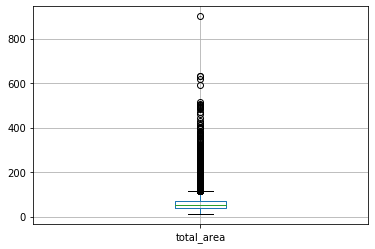

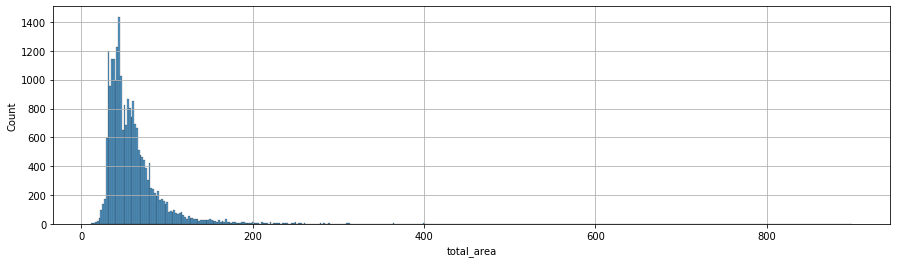

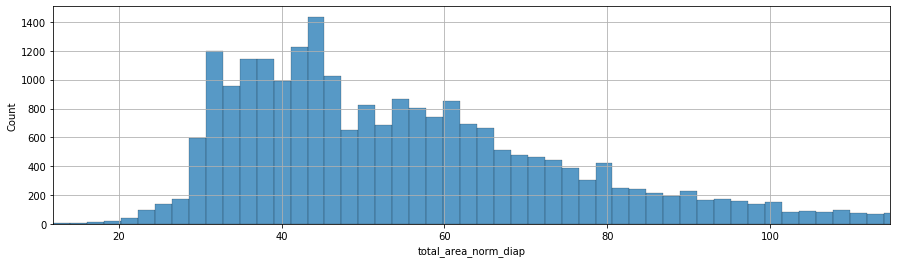

In [39]:
describe_plus('total_area') #парметры значений площади

На гистограмме распределения кваритир по общей площади можно выделить несколько пиков и полупиков: это значения площадей около 30, 40-45, 50-70, 80 и 100 м2. Вероятно, это отражает разброс предложения по количеству комнат в квартирах. Учитывая что размер комнаты в среднем составляет 12-17 м2, то каждый пик - это результат некоторого усредненного по площади предложения квартир исходя из количества их комнат. Присутствуют предложения площадью от 12 м2 - возможно это продажа отдельных комнат и маленьких студий. Данный разброс предложений выглядит вполне естественно: квартиры малой площади всегда имееют большее число предложений, как правило, они рассматриваются в качестве первого жилья, поэтому первые два пика близки по величине. Для состоявшихся семей с детьми требуется жилье большей площади, учитывается необходимость в площади для каждого члена семьи. Чем больше членов в семье, тем большая по площади к покупке рассматривается квартира, обычно это происходит с продажей текущего жилья. Учитывая, что количество детей в семье имеет обратную зависимость с количеством таких семей, можно предположить, что и предложение с ростом площади будет уменьшаться - людям уже достигшим определенного уровня достатка и обеспеченности жильем в необходимой площади нет смысла тратиться на жилье большей площади. Стоит отметить также тот факт, что площадь квартиры оказывает также прямое влияние на ее стоимость. После размеров площадей около 100м2 количество предложений уменьшается, квартиры площадью от 200 м2 имеют предложения единичного характера - такие квартиры продают и покупают только очень обеспеченные люди ввиду их соответствующей цены, они не относятся к квартирам массового сегмента - предложение их ограничено физически, таких объектов недвижимости вприципе мало. Согласно диаграмме размаха в выбросах встречаются значения площадей до 500 м2 и есть несколько значений с площадями около 600 и даже 900 м2. Возможны ли такие площади - скорее да, чем нет, например если квартира занимает целый этаж, но такие квартиры уникальны, стоят очень дорого, и продать их скорее всего нелегко, ведь спрос на них минимален.

Уберем из полученной таблицы квартиры с нетипичными площадями.

Согласно СНиП 31-01-2003 "Здания жилые многоквартирные" площадь жилых помещений в однокомнатной квартире не должна составлять менее 14 м2, а кухни ниши - менее 5 м2. Итого минимальная площадь квартиры, в том числе студии должна составлять не менее 19 м2.

Проверим, сколько квартир, не соответствующих данным условиям находится в полученной таблице.

Примем 19 м2 как нижний предел нормальных значений для площади.
Согласно диграмме размаха, верхний предел нормальных значений в соответствии с данными описательной статистикиЪ: 114.75 для исходной таблицы df. Такую площадь можно оценить как площадь современной четырехкомнатной квартиры. Но надо учитывать что предложение квартир далеко не оканчивается четырехкомнатными квартирами. Однако,диаграмма рзмаха площадей показывает наличие большого и достаточно непрерывного ряда выбросов вплоть до величин в 350 м2. На гистограмме видно наличие достаточно устойчивого, пусть и небольшого (но не единичного) объема предложений вплоть до площадей до 250 м2. В силу размера такие квартиры пусть и не являются самыми продаваемыми на рынке, но предложение и вероятно спрос на них существуют - исключать для их из исследуемых данных не следует. Примем за верхний предел исследуемых значений по площади - 250 м2.

Найдем количество квартир в исходной таблице, которые не попадают под определенные нормальные значения площадей.

In [40]:
df.query('total_area < 19')['total_area'].count() #количество квартир площадью менее 19 м2

24

In [41]:
df.query('total_area > 250')['total_area'].count() #количество квартир площадью более 250 м2

112

Дополнительно проверим, есть ли в отсортированной таблице жилые объекты, чья жилая площадь или площадь кухни превышает общую, а площадь кухни превышает жилую.

In [42]:
df.query('total_area < living_area')['total_area'].count() 
#количество квартир, в которых жилая площадь больше общей

0

In [43]:
df.query('total_area < kitchen_area')['total_area'].count()
#количество квартир, в которых площадь кухни больше общей

0

In [44]:
df.query('living_area < kitchen_area')['total_area'].count()
#количество квартир, в которых площадь кухни больше жилой

355

Объектов с площадью кухни больше жилой 355 - такое сочетание характерно для так называемых квартир формата "+" или "европланировки", с большой кухней столовой и комнатами в сумме площади меньше по размеру, чем кухня.

Приведем таблицу для исследования df_sort к полученным нормальным значениям площадей квартир.

In [45]:
df_sort = df_sort.query('total_area >= 19 and total_area <= 250').reset_index(drop=True)
#сортировака таблицы по площадям

### Исследование квартир по цене 'last_price' 

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

norm_values_down 12190.0
norm_values_up 11900000.0



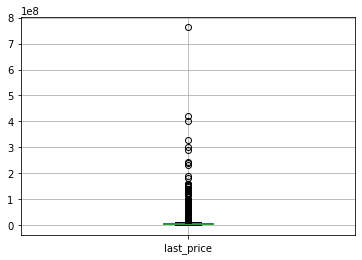

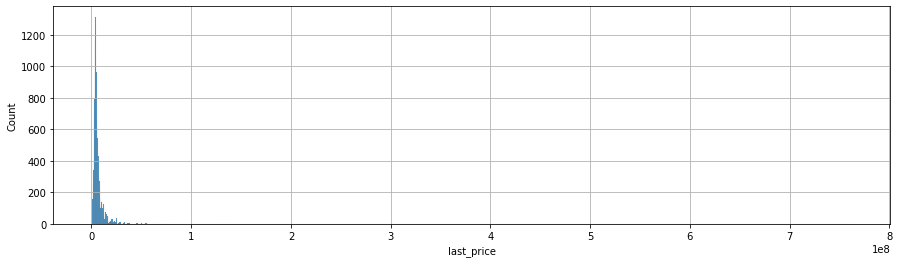

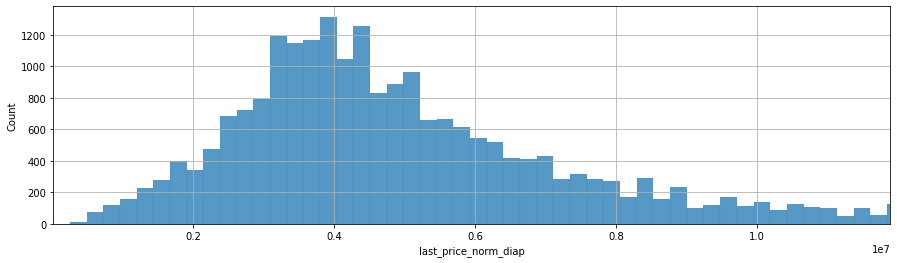

In [46]:
describe_plus('last_price') #парметры значений цены

Гистограмма предложений квартир по стоимости в общем виде повторяет диаграмму по общей площади, это связано с тем, что площадь квартиры и ее цена находится в прямой зависиости. Однако на диаграмме стоимости нет явно выраженных пиков - она более сглажена, что может быть обусловлено дополнительными факторами цены: такими, например, как месторасположение квартиры или её состояние. Наибольшее предложение квартир приходится на квартиры стоимостью 3-4 миллиона рублей - вероятно, это и есть самый распостранненный тип квартир площадью 30-40 м2 (студии, однокомнатные, небольшие двухкомнатные).  Далее видно слабовыраженные ступени в диапазонах 4-5 млн., 5-6 млн., 6-7.5 млн., 7.5-9 млн. - что соответсвует квартирам с большим колличествам комнат. После этого колличество предложений сильно уменьшается. Квартиры стоимостью более 15 млн.рублей имеют очень ограниченное предложение - это небольшое колличество квартир с большой плошадью и стоимостью. Диаграмма размаха показывает, что кваритиры до 200 млн рублей имеют место быть, но в черезвычайно ограниченом количестве. Есть даже едниничные предложения в стоимостью около 300, 400 и 763 млн руб. Возможно, квартиры за суммы, колеблющиеся около полумилиарда рублей - это ошибочные данные, но наверняка это утверждать невозможно, не зная их точных характеристик. 

Применненые выше метод describe() и диаграмма размаха, показывают минимальное значение стоимости квартиры - 12000, максимальное 763000000000 рублей. Как понять границы нормальных значений. Диаграмма размаха дает представление для нормальных значений, однако в нашем случае минимальное значение цены будет соответствовать нижней границе нормальных значений, но 12000 - это явно неадекватная цена или цена приведенная в каких-либо других единицах(иностранной валюты).

Воспользуемся следующим подходом, сгруппируем данные по названию населенного пункта и определим медианное значение  стоимости квадратного метра. Далее найдем в этих значениях минимальное и умножим его на минимальную площадь для квартиры доступной в данном населенном пункте - так мы сможем оценить минимальную адекватную стоимость квартиры в предложеной таблице. Сравним это значение со значениями минимальной стоимости квартир.

In [47]:
median_sq_meter_price = df.pivot_table(index='locality_name', values='sq_meter_price', aggfunc='median')
median_sq_meter_price.sort_values(by='sq_meter_price').head()

,sq_meter_price
locality_name,
деревня Старополье,11000.0
посёлок станции Свирь,11481.5
деревня Вахнова Кара,11688.0
деревня Выскатка,12335.5
поселок Совхозный,12629.5


In [48]:
df.query('locality_name == "деревня Старополье"') #квартиры в населенном пункте с самым дешёвым квадратным метром

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3km,ponds_nearest,days_exposition,sq_meter_price,weekday,month,year,floor_type,living_to_total_area_rat,kitchen_to_total_area_rat
6859,6,490000.0,40.0,2017-12-11,1,NaN,5,NaN,3,False,...,NaN,NaN,43,12250,0,12,2017,other,NaN,NaN
9581,7,450000.0,43.4,2018-08-31,2,NaN,5,30.3,3,False,...,NaN,NaN,96,10369,4,8,2018,other,0.7,0.13
16274,18,440000.0,40.0,2018-07-10,1,NaN,5,NaN,1,False,...,NaN,NaN,45,11000,1,7,2018,first,NaN,NaN


Как видно из предсталенных данных, самые дешевые квартиры расположены в деревне Старополье, полученная цена квадратного метра соответствует однокомнатной квартире самого распространеннго типа предложений. Анализ полученной минимальной медианной цены и площади позволяет сделать вывод о том, что минимальная цена квартиры в представленной таблице должна составлять около 440000 рублей.

Проверим как соотносятся полученные данные с данными таблицы, найдем минимальные значения стоиимости

In [49]:
df.sort_values(by='last_price').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3km,ponds_nearest,days_exposition,sq_meter_price,weekday,month,year,floor_type,living_to_total_area_rat,kitchen_to_total_area_rat
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,0,NaN,8,112,2,3,2019,last,0.29,0.37
17456,7,430000.0,30.4,2019-04-22,1,NaN,2,16.0,1,False,...,NaN,NaN,NaN,14145,0,4,2019,first,0.53,0.20
14911,5,430000.0,54.0,2018-06-26,2,NaN,3,NaN,3,False,...,NaN,NaN,44,7963,1,6,2018,last,NaN,NaN
16274,18,440000.0,40.0,2018-07-10,1,NaN,5,NaN,1,False,...,NaN,NaN,45,11000,1,7,2018,first,NaN,NaN
17676,0,450000.0,36.5,2018-02-01,1,NaN,5,17.3,4,False,...,NaN,NaN,120,12329,3,2,2018,other,0.47,0.23


В таблице присутствуют значения цены квартиры и ниже.  И если цена за квартиру в 12190 - это явно ошибочные данные, то цена 430000 - вполне реалистична и объясняется тем, что стоимость квадратного метра данной квартиры выше полученной медианны минимальной стоимости, однако площадь ее меньше. Определим минимальную границу стоимости в 430000.

Попробуем применить аналогичный подход к максимальной стоимости.

In [50]:
median_sq_meter_price = df.pivot_table(index='locality_name', values='sq_meter_price', aggfunc='median')
median_sq_meter_price.sort_values(by='sq_meter_price', ascending=False).head()

,sq_meter_price
locality_name,
посёлок Лисий Нос,121616.5
Санкт-Петербург,104762.0
Зеленогорск,101666.5
Кудрово,100000.0
Пушкин,100000.0


In [51]:
df.query('locality_name == "посёлок Лисий Нос"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3km,ponds_nearest,days_exposition,sq_meter_price,weekday,month,year,floor_type,living_to_total_area_rat,kitchen_to_total_area_rat
12047,8,2750000.0,36.9,2015-05-13,1,3.0,2,19.0,2,False,...,0,NaN,1375,74526,2,5,2015,last,0.51,0.23
21934,3,7305000.0,43.3,2018-10-09,1,NaN,10,NaN,10,False,...,0,NaN,60,168707,1,10,2018,last,NaN,0.23


Умножив максимальную медианную цену на максимальную площадь квартир в посёлке Лисий Нос, мы не получим адекватной границы максимальной цены, так как предложение квартир в данном населенном пункте  ограничено (всего 2, однокомнатные), площади невелики. Вероятно в Санкт-Петербурге присутствуют более дорогие и просторные квартиры.

In [52]:
df.query('locality_name == "Санкт-Петербург"')['last_price'].mean() # средняя стоимость квартир в СПб

8062507.068634311

In [53]:
df.query('locality_name == "Санкт-Петербург"')['last_price'].median() # медианная стоимость квартир в СПб

5500000.0

Как видим, медианная стоимость квартир в Санкт-Петербурге находистся в диапазоне цен посёлка Лисий Нос, однако, средняя стоимость зачительно выше, что говорит о наличии предложений с гораздо большим уровнем стоимости.

Согласно полученным описательным статистикам верхняя граница нормальных значений стоимости для всей таблицы составляет:

In [54]:
norm_values_up('last_price')

11900000.0

Однако на гистограмме видно плавное снижение предложения без каких-либо серьезных колебаний до величины в 20000000 рублей, далее предложение примерно равномерно одинаково и невелико, то есть не носит массового характера.

Примем в качестве верхней границы исследований по цене стоимость квартир в 20000000 рублей.

Создадим таблицу для исследования, в которой из исходной таблицы исключим значения по стоимости квартир ниже 430000 и выше 200000000 руб.

In [55]:
df_sort = df_sort.query('last_price >= 430000 and last_price <= 20000000').reset_index(drop=True)



### Исследование квартир по количеству комнат 'rooms'

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

norm_values_down 0.0
norm_values_up 6.0



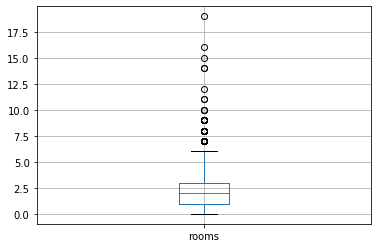

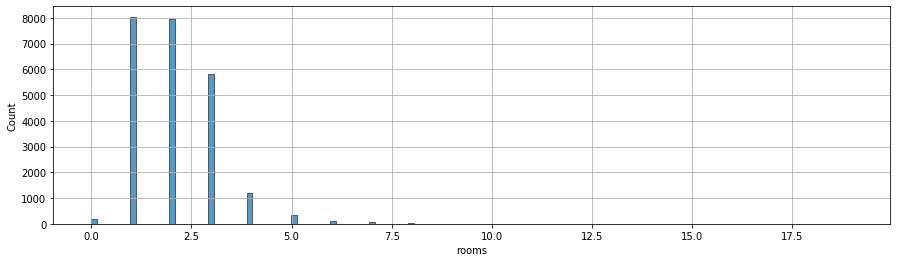

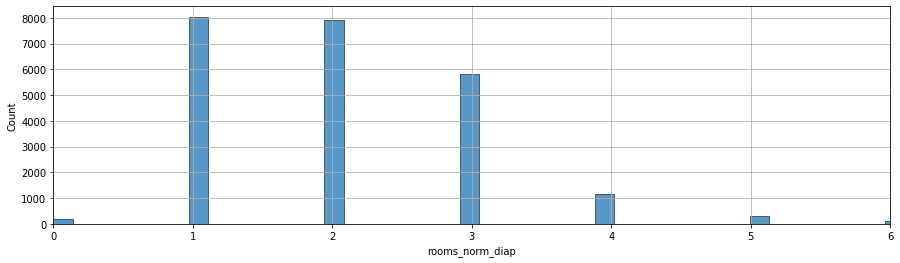

In [56]:
describe_plus('rooms') #параметры значений цены

Гистограмма распределения квартир по количеству комнат подтверждает предположения, сделанные при исследования общей площади. Самые распространненые квартиры - это однокомнатные (вероятно, сюда можно отнести и студии) и двухкомнатные. Предлоджений с большим количеством комнат становится все меньше, а квартиры с более чем шестью комнатами встречаются крайне редко. На гисторгамме также отмечен столбец с квартирами, в которых было указано 0 комнат, возможно сюда заносились отдельно продающиеся комнаты или студии, в которых не выделяются отдельные жилые комнаты, либо квартиры свободной планировки. Диаграмма распределения показывает отдельные выбросы и до 19 комнат.

Чтобы избежать неясных трактовок связи стоимости с колличеством комнат уберем из таблицы квартиры с колличеством комнат 0. Согласно данным, наибольшее число комнат - 19. Наибольшее распространение получили квартиры с числом комнат до трех. Граница нормально допустимых значений согласно диаграмме размаха - примерно 6 комнат. Но на гистограмме визуально можно различить предложения неединичного характера с квартирами до 8 комнат.

In [57]:
df.query('rooms > 8')['rooms'].count() #количество квартир с общим количеством комнат более 6

19

In [58]:
df.query('rooms == 0')['rooms'].count() #количество квартир с количеством комнат 0

197

Приведем таблицу для исследования к нормальным значениям по количеству комнат: от 1 до 8.

In [59]:
df_sort = df_sort.query('rooms > 0 and rooms <= 8').reset_index(drop=True)

### Исследование квартир по высоте потолков 'ceiling_height'

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

norm_values_down 2.1000000000000005
norm_values_up 3.2199999999999998



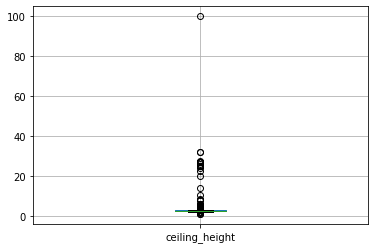

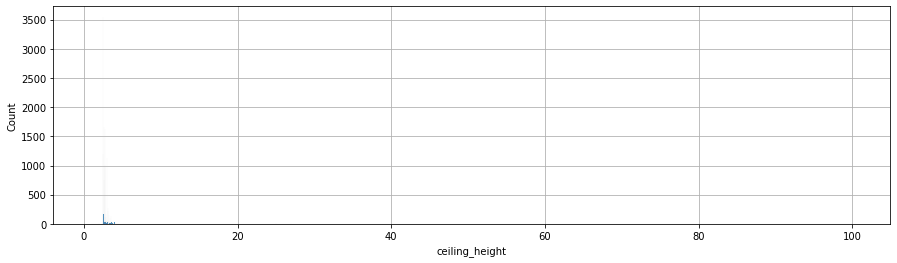

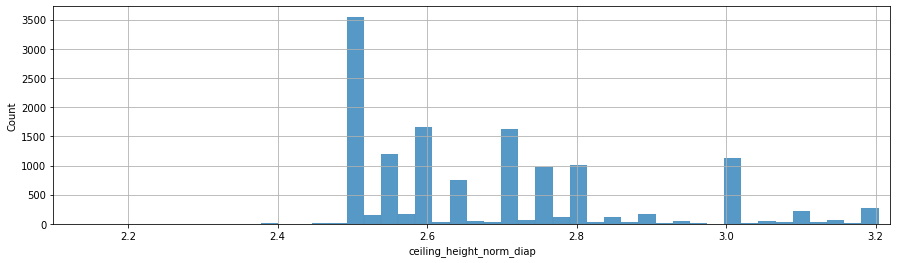

In [60]:
describe_plus('ceiling_height') #параметры значений цены

Самая распространенная высота потолков - 2,5 метра, это очевидно, это минимум для массовой жилой застройки. Второй пик  - квартиры с высотой потолков 2,7-2,8 метра - это современные квартиры также относящиеся к массовой застройке с современными более комфортными стандартами геометрии помещений. Третий пик - высота потолков чуть больше 3 м - квартиры комфорт-класса. Далее - резкое снижение колличества предложений. Квартиры с высотой потолков более 4 метров - встречаются редко. Скорее всего квартиры с потолками ниже 2,5 метров и выше 10 метров - это явные ошибки: в первых некомфортно, а иногда невозможно находиться человеку со средним ростом, вторые - больше похожи на производственные или складские помещения.

Согласно тому же СНиП 31-01-2003 "Здания жилые многоквартирные" минимальная высота потолков жилых помещений должна составлять не менее 2,5 м - именно эту величину следует принять за ганицу нормальных значений для данного параметра.

In [61]:
df.query('ceiling_height < 2.5')['rooms'].count() #количество квартир с высотой потолков менее 2,5 метров

73

Согласно описательным статистикам верхний предел нормальных значений по высоте потолков составляет 3,22 м. Округлим это значение до 4 метров и примем в качестве верхнего предела нормальных значений.

In [62]:
df.query('ceiling_height > 4')['rooms'].count() #количество квартир с высотой потолков более 4 метров

75

Очистим таблицу для исследования от объектов недвижимости с высотой потолков менее 2,5 и более 4 метров при этом сохраним строки, в которых данные по высоте потолков отсутствуют

In [63]:
df_sort = df_sort.query('(ceiling_height <= 4 and ceiling_height >= 2.5) or ceiling_height.isna()').reset_index(drop=True)

### Исследование квартир по номеру этажа и этажности здания 'floor' и 'floors_total'

Анализ данных параметров обозначим проверкой следующих показателей:
1. Существуют ли значения этажей и этажности здания меньше, либо равными нулю.
2. Существуют ли объекты недвижимости с номером этажа больше этажности здания.
3. Какова может быть максимальная этажность зданий в предоставленной таблице.

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

norm_values_down 1.0
norm_values_up 17.0



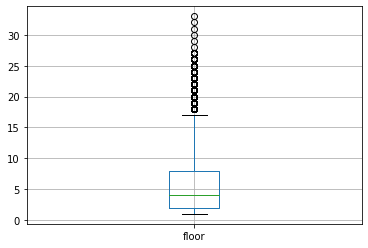

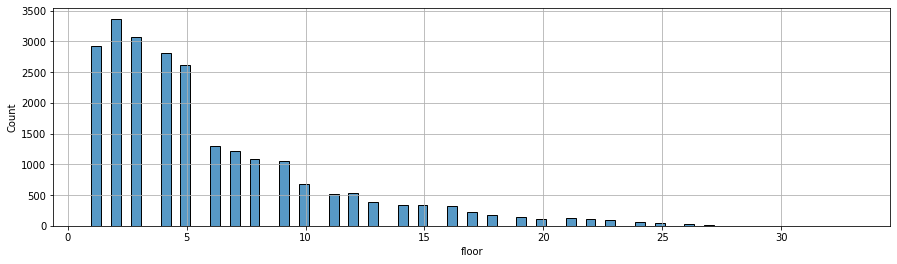

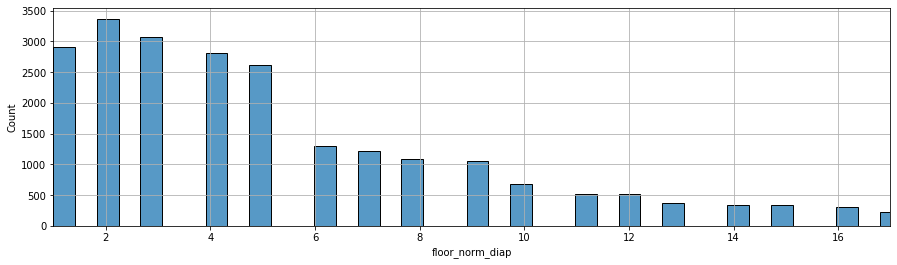

In [64]:
describe_plus('floor')#описание значений номера этажа

Этажи с номерами равными или меньше нуля отсутствуют, максимальный номер этажа - 33.

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

norm_values_down 1.0
norm_values_up 32.5



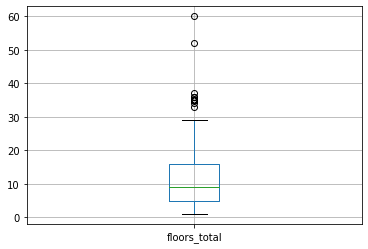

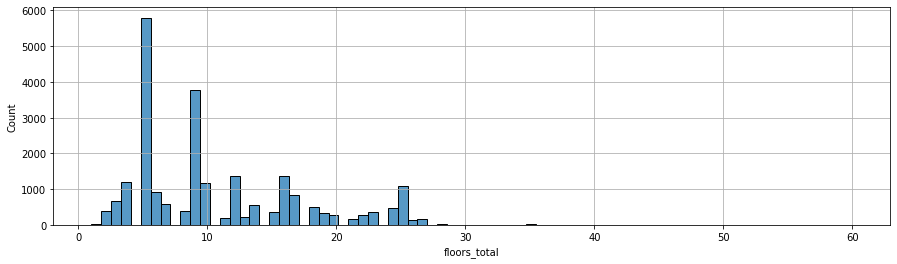

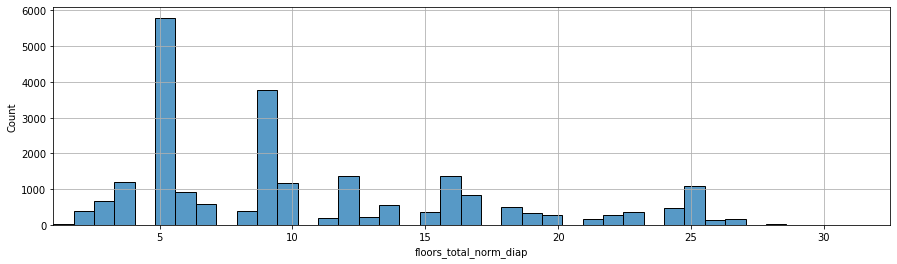

In [65]:
describe_plus('floors_total') #описание значений этажности

Количество этажей в зданиях не имеет отрицательных значений и значений равных нулю. Максимальная указанная этажность - 60 этажей, минимальная - 1 этаж.

Самая распространенная этажность зданий - 5 и 9 этажей. Самый распространенный к продаже этаж - второй.

Самое высокое жилое многоэтажное здание Санкт-Петербурга и Ленинградской области (согласно https://peterburg.center и другим источникам) - ЖК "Князь Александр Невский" -37 этажей.

Таким образом за диапазон действительных значений этажности можно принять диапазон от 1 до 37 этажей - все отальное - ошибочные данные.

In [66]:
df.query('floors_total > 37')['total_area'].count() #квартиры этажностью более 37

2

Проверим обявления на предмет наличия номера этажа больше этажности здания.

In [67]:
df.query('floor > floors_total')['total_area'].count() #описание значений этажности

0

Среди обявлений нет таких, в которых номер этажа превышал бы этажность здания.

Очистим таблицу для исследования от объектов недвижимости с этажностью более 37.

In [68]:
df_sort = df_sort.query('floors_total <= 37 or floors_total.isna()').reset_index(drop = True)

### Исследование времени продажи кватиры 'days_exposition'

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

norm_values_down 1.0
norm_values_up 512.5



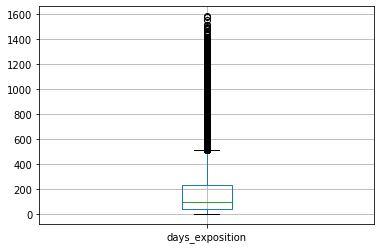

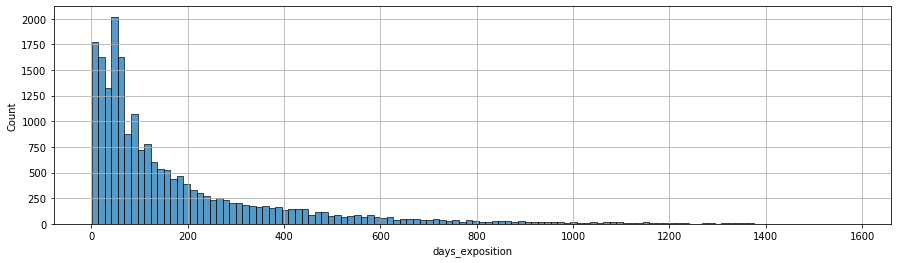

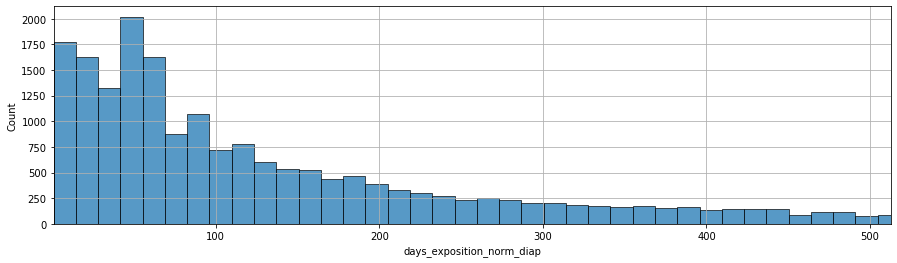

In [69]:
describe_plus('days_exposition') #параметры значений цены

Полученные результаты позволяют сделать следующие выводы:
1. Среднее время продажи квартиры - примерно 181 день.
2. Медианное время продажи 95 дней.
3. Продажу можно назвать быстрой, если сделка состоялась в течении первых 1,5 месяцев: 45 дней - значение первого квартиля, на диграмме примерно в этих значениях также отмечен характерный пик продаж - продавцы таких квартир, видимо, настроены на скорейшем совершении сделки. После этого срока видно резкое падение объема продаж.
4. 50% всех квартир были проданы с период от 45 до 232 дней (между границами первого и третьего квартиля)
4. Продажи от границ третьего квартиля 232 дня (около 7 месяцев) можно считать затяжными - это значение превышает как медианное так и среднее время продажи.
5. Согласно диаграмме размаха ненормальными значениями считаются продажи длительность примерно от 512 дней - это примерно 1,5 года, максимальное значение достигает 1580 дней - чуть более 4 лет.
Действительно, если квартира не может быть продана такое время, то тут либо дело в цене, которую продавец неадекватно долго держит на высоком уровне и не заинтересован в факте продажи, либо что-то не так с самой квартирой и покупатели обходят её стороной.

### Подсчет объема потери данных после очистки

In [70]:
df_sort.info()
#таблица для исследований очищенная от редких и выбивающихся значений 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22586 entries, 0 to 22585
Data columns (total 29 columns):
total_images                 22586 non-null int64
last_price                   22586 non-null float64
total_area                   22586 non-null float64
first_day_exposition         22586 non-null datetime64[ns]
rooms                        22586 non-null int64
ceiling_height               13778 non-null float64
floors_total                 22506 non-null Int64
living_area                  20816 non-null float64
floor                        22586 non-null int64
is_apartment                 22586 non-null bool
studio                       22586 non-null bool
open_plan                    22586 non-null bool
kitchen_area                 20627 non-null float64
balcony                      22586 non-null Int64
locality_name                22586 non-null object
airports_nearest             17202 non-null float64
city_centers_nearest         17219 non-null float64
parks_around_3km    

По отношению к исходной таблице потеря данных в процентном отношении составила:

In [71]:
(len(df)-len(df_sort))/len(df)*100

4.696400692012321

Объем потери данных довольно ощутимый, однако очищенные данные позволят точнее выявить взаимосвязи параметров таблицы.

### Вывод

Проведена дополнительная обработка данных, в ходе которой исключены редкие и выбивающиеся из общего распеределения значения:


    1. Исключены объекты недвижимости без названия населенного пункта. Утановлено, что для названиий населенных пунктов одновременно употребляются слова "поселок" и "посёлок", названия приведены к форме "посёлок".

    2. С учетом полученных средних, медианных и нормальных значений для всего предложения для исследования отобраны объекты недвижимости со следующими параметрами:
        - Общая площадь от 19 до 250 м2;
        - Общая стоимость от 430000 до 20000000 рублей;
        - Колличество комнат от 1 до 8;
        - Высота потолков от 2,5 до 4 м;
        - Этажность: до 37 этажей влючительно.
   
Установлены следующие средние значения продаваемых объектов недвижимости:
  -  Общая площадь: около 60 м2 (наиболее распространенные картиры - от 30 до 80 м2);
  -  Стоимость: около 6,5 млн. руб. (медианна стоимость - 4, 65 млн. руб.);
  -  Колличество комнат 2 (наиболее распространены 1-2-3 комнатные квартиры);
  -  Высота потолков: 2,7 м (самые распространенные квартиры - с высотой потолков 2,5 м);
  -  Этажность здания: около 6 этажей (наиболее распространены здания до 6 этажей);
  -  Среднее время продажи: примерно 181 день (медиана - 95 дней).
  

Объем потери данных после исключения обектов с редкими, выбивающимися и отсутсвующими значениями характеристик составил 4,7%.


## Изучение факторов и степени их влияния на стоимость квартиры.

Установим степень влияния на стоимость квартиры различных факторов:  площади, числа комнат, этажа (первого или последнего), удалённости от центра; от даты размещения: дня недели, месяца и года. Для изучения зависимостей определим коэффициент корреляции (по умолчанию по методу Пирсона) цены от соответствующего фактора (если он представляет из себя числовое значение),будем использовать диаграммы разброса и графики, построенные на основании сводных таблиц по медианным значениям цены для зависимостей от тех параметров, исследуемый диапазон которых узок (количество комнат, тип этажа, дни, месяцы годы)

In [72]:
def influence_to_price(col):
    print('Коэффициент корреляции: ',df_sort.last_price.corr(df_sort[col]).round(2))
    print()
    
    plt.figure(figsize=(15,4))
    sns.scatterplot(data=df_sort, x=col, y="last_price", alpha = 0.1)
    plt.grid()
    plt.show()
    
    piv_table = df_sort.pivot_table(index=col, values='last_price', aggfunc='median').reset_index()
    plt.figure(figsize=(15,4))
    sns.barplot(data=piv_table, x=col, y='last_price')
    plt.xticks(rotation=45, fontsize=9)
    plt.grid()
    plt.show()

### Зависимость цены от площади

Для удобcтва восприятия зависимости стоимости квартиры от цены сгруппируем площади квартир по декадам, округлив их до десятков и добавив соответсующий столбец в таблицу. 

In [73]:
df_sort['total_area_round_decade'] = df_sort['total_area'].round(-1)

Коэффициент корреляции:  0.77



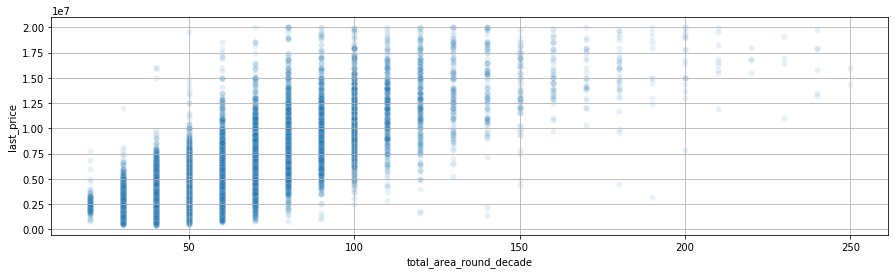

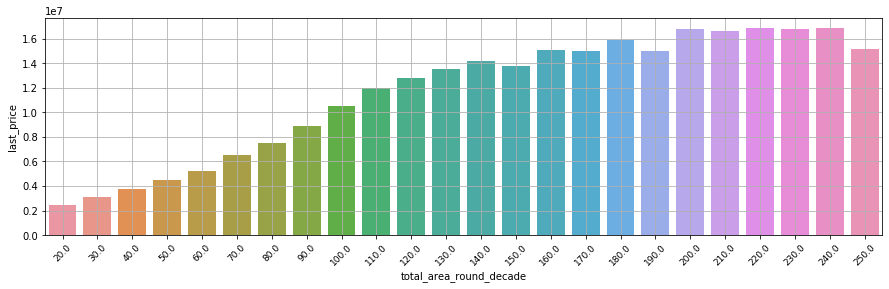

In [74]:
influence_to_price('total_area_round_decade')

Коэффициент корреляции 0,77 - это достаточная величина, чтобы говорить о явной прямой сильновыраженной зависимости двух величин. Ожидаемо стоимость квартиры имеет прямопропорциональную зависимость от её площади - чем больше площадь, тем больше и цена. Но следует отметить следующие особенности, для квартир площадью примерно до 100 м2 и ценой до 10 млн. руб. прослеживается чёткий корридор стоимости, примерно в 1 млн. рублей для рассматриваемой площади. То есть в зависиости от местоположения квартиры, её состояния и прочих характеристик можно приобрести квартиры равной площади но с указанным разбросом цен. Для квартир более 100 м2 этот разброс не имеет такого выраженного характера.

### Зависимость цены от количества комнат

Коэффициент корреляции:  0.51



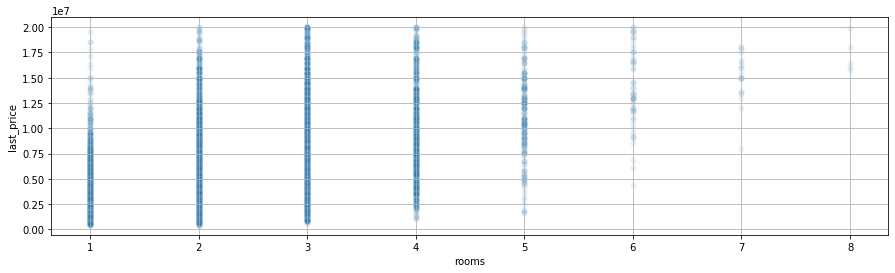

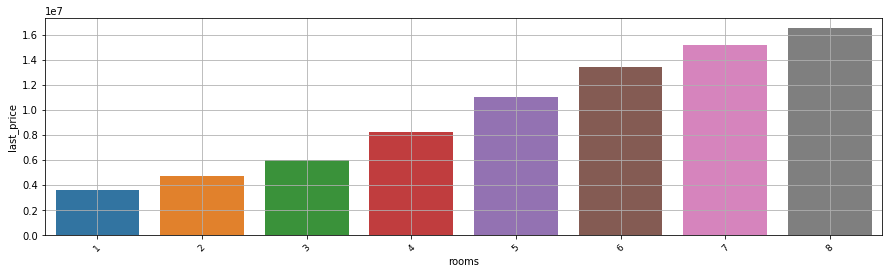

In [75]:
influence_to_price('rooms')

Коэффициент корреляции 0,51 - это меньше, чем зависимость от общей площади, однако это достаточно большая величина. Зависимость стоимости квартиры от количества комнат также вполне ожидаемая: чем больше комнат (соответственно и общая площадь), тем выше стоимость квартиры. Однако, на графике можно выделисть следующую особенность: для квартир с количеством комнат до трёх коэффициент пропорциональности имеет меньшее значение, чем для квартир с количеством комнат от 3 до 6, далее коэффициент пропорционалльности также незначительно снижается. Это связано с тем, что для квартир с большим количеством комнат повышается минимальных уровень цен, что приводит к занчительному смещению медианных значений цены вверх, а после 6 комнат зависимоть стоимости квартиры от её площади понижается, так как квартиры уже выходят за рамки массового сегмента и возможно для подобного рода квартир влияние на стоимость в первую очередь оказывает не количество комнат, а общая площадь.

### Зависимость цены от типа этажа (первый, последний, другой)

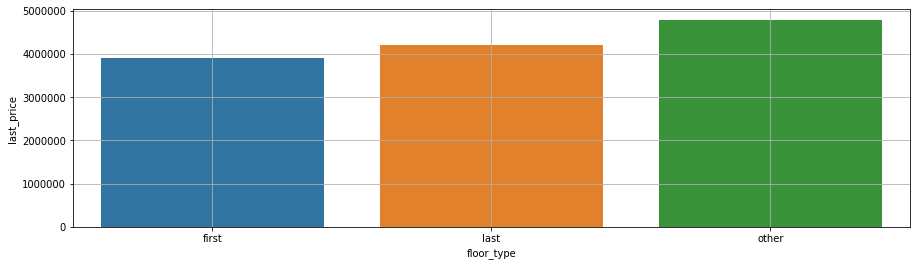

In [76]:
floor_type_median = df_sort.pivot_table(index='floor_type', values='last_price', aggfunc='median').reset_index()
plt.figure(figsize=(15,4))
sns.barplot(data=floor_type_median, x='floor_type', y='last_price')
plt.grid()
plt.show()

In [77]:
df_sort.groupby('floor_type')['last_price'].median()
#диаграмма разброса зависимости стоимости квартиры от типа этажа

floor_type
first    3900000.0
last     4200000.0
other    4790000.0
Name: last_price, dtype: float64

Традиционно квартиры на первом и последнем этажах пользуются наименьшей популярностью, и продавцы вынуждены занижать по ним цены при прочих равных условиях. Однаком у квартир на последнем этаже больше преимуществ перед квартирами на первом, поэтому уровень медианнх цен по ним всё же выше.

### Зависимость цены от удаления от центра

Коэффициент корреляции:  -0.36



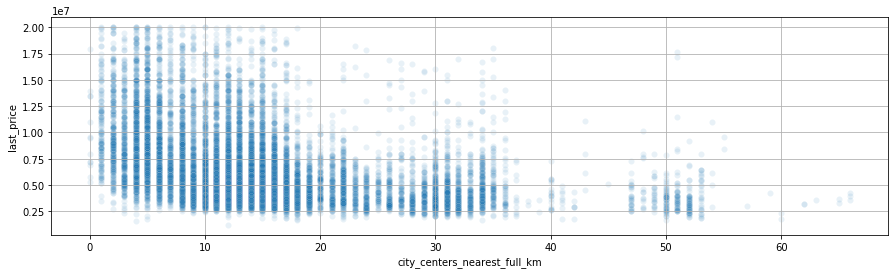

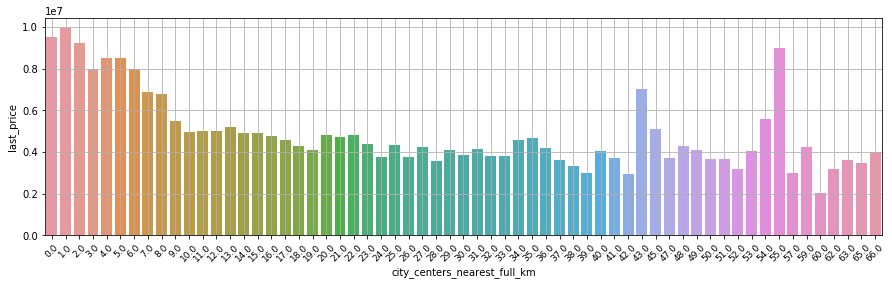

In [78]:
df_sort['city_centers_nearest_full_km'] = df_sort['city_centers_nearest'].round(0)
influence_to_price('city_centers_nearest_full_km')

Коэффициент корреляции -0,36 - зависимость обратная, слабовыраженная. Зависимость стоимости квартиры от её удаленности от центра носит естественный характер - эта зависимость обратная и имеет следующие особенности: самые дорогие квартиры сосредоточены на удаленности примерно до 5км (условно можно идентифицировать как "зона шаговой доступности"), далее наблюдается ощутимое снижение уровня цен до удаленности в 10 км. Начиная с удаленности в 10 км и более зависиость цены от удаленности от центра не носит выраженного характера. Следует отметить резкие провалы на диаграмме рассеяния в предложении с удаленностью 35-45 км и более 55 км. Вероятно это звязано с тем, что 35 км - это примерно максимальный физический радиус удаленности от центра для самого большого населенного пункта Ленинградской области - Санкт-Петербурга-то есть это по сути самые дальние границы города. Большое количество предложений с удаленностью примерно в 50 км можно объяснить возможными жилищными сообществами (жилыми комплексами, котеджными и дачными поселками), которые не находятся в границах конкретного населенного пункта а центр населенного пунка для таких объектов выбран как центр Санкт-Петербурга. Также следует отметить очень малое число предложений для квартир с низкой стоимостью с удалелением менее 10 км, от центра, что объянимо превышением спроса над предложением в таком сегменте.

### Зависимость цены от дня недели, в который было опубликовано объявление

Коэффициент корреляции:  -0.02



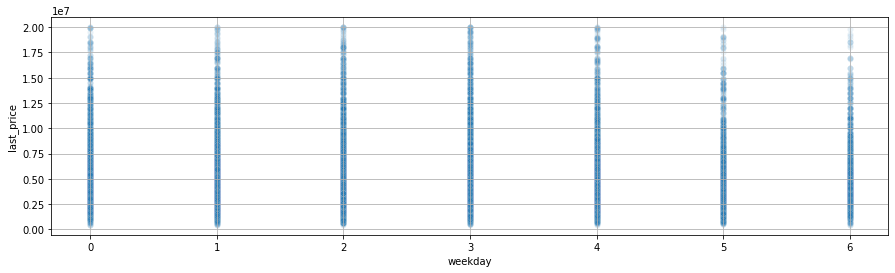

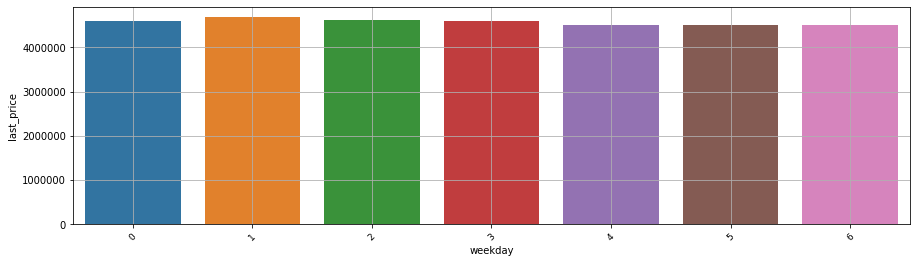

In [79]:
influence_to_price('weekday')

Коэффициент корреляции -0,016 - зависимость обратная и слабовыраженная. Можно заключить, что цена не зависит от даты публикации объявления.

### Зависимость цены от месяца публикации объявления

Коэффициент корреляции:  0.01



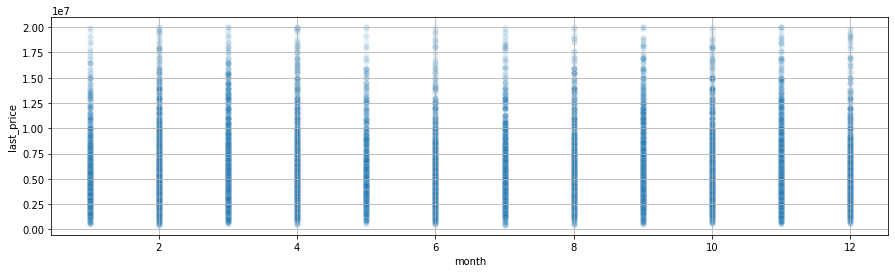

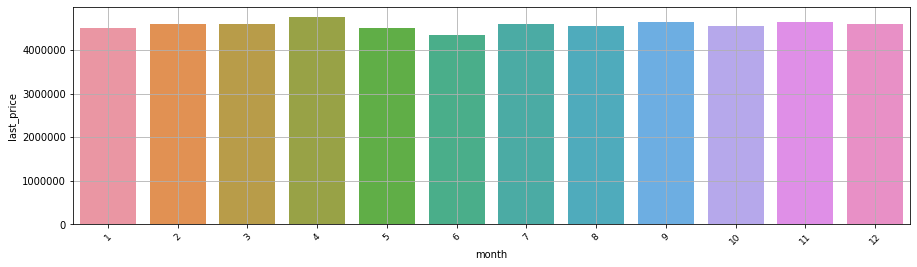

In [80]:
influence_to_price('month')

Коэффициент корреляции 0,01 - зависимость прямая, практически отсутствует. Однако можно выделить некоторые особенности: зависимость цены от месяца публикации также имеет волнообразный характер, традиционно спрос на недвижимость падает в весенне-летние  месяцы в связи с периодом отпусков и праздников и растет в весенние и осенние месяцы - цена в эти месяцы корректируется соответсвующим образом.

### Зависимость цены от года публикации объявления

Коэффициент корреляции:  -0.02



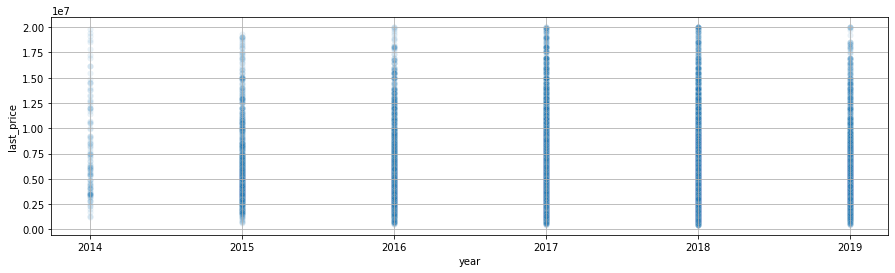

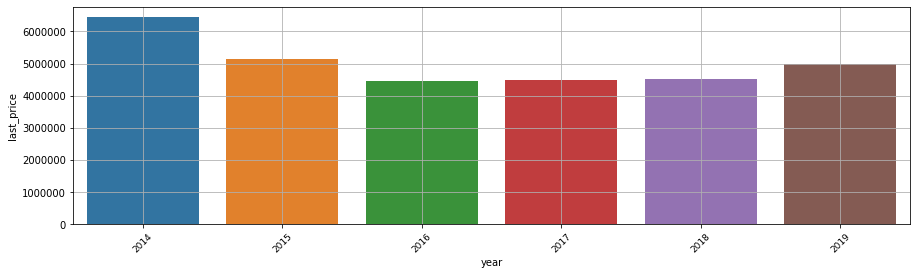

In [81]:
influence_to_price('year')

Коэффициент корреляции -0,02 - зависимость обратная, слабовыраженная, практически отсутсвует. Отмечаются следующие особенности: начиная с 2014 года до 2016 уровень медианных цен на недвижимости падал, в 2016-2018 наблюдается стабилизация уровня цен, а с 2019 - их рост. Такое положение дел можно описать тем, что с 2014 года - наблюдался рост предложенния в сегменте дешёвых квартир, возможно это связано со строительным бумом который увеличил объемы рынка и создал конкуренцию с одной стороны, с другой стороны это может подпитываться ростом объемов ипотечного кредитования которые привели к увеличению спроса и возможности покупки более дешевых квартир. В 2016-2018 рынок оказался насыщенным, спрос и как следствие объем предложения упали. Далее на фоне общего роста цен, происходит рост стоимости квартир. 

### Зависимость цены от высоты потолков

Коэффициент корреляции:  0.52



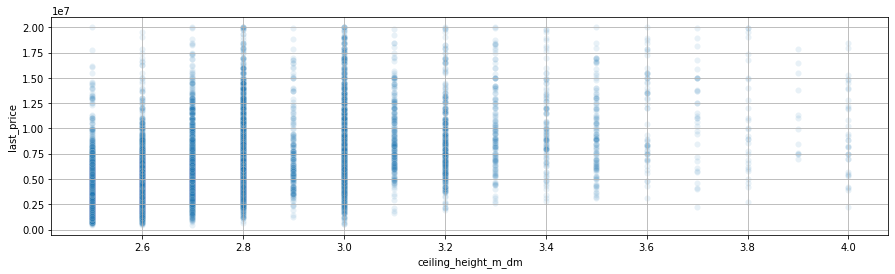

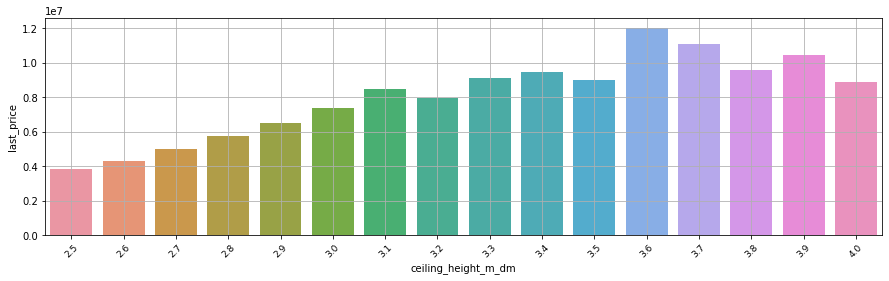

In [82]:
df_sort['ceiling_height_m_dm'] = df_sort['ceiling_height'].round(1) #высота потолков приведенная к метрам и дециметрам
influence_to_price('ceiling_height_m_dm')

Коэффициент корреляции 0,52 - зависимость прямая, достаточно выраженная. График зависимости цены квартиры от высоты потолков указывает на тренд увеличения стоимости квартир при увеличении высоты потолков примерно до значений в 3 метра, однако данная прямопропорциональная зависимость не ярко выражена. При высоте потолков до 2.6 м звисимость практически отсутствует. Самая высокая плотность предложений - это квартиры с высотой потолков до 2.8 и и 3 м. 

### Исследование стоимости квадратного метра и стомости жилья в 10 населенных пунктов с наибольшим количеством объявлений

Получим список населенных пунктов с наибольшим колличеством объявлений. 

In [83]:
ten_most_quantity_ad_loc_name = df_sort.groupby('locality_name')['last_price'].count().sort_values(ascending=False).head(10)

In [84]:
ten_loc_name_list = ten_most_quantity_ad_loc_name.index
#получение списка десяти обектов недвижимости с самым большим числом объявлений
ten_loc_name_list

Index(['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово',
       'Выборг'],
      dtype='object', name='locality_name')

In [85]:
df_ten_most_ad_loc = df_sort.query('locality_name in @ten_loc_name_list').reset_index(drop=True)
# получение среза по списку населенных пунктов с самым большим числом объявлений

In [86]:
df_ten_most_ad_loc.pivot_table(index='locality_name', values='sq_meter_price', aggfunc='mean').sort_values('sq_meter_price', ascending=False)
#получение средней цены квадратного метра по списку населенных пунктов

,sq_meter_price
locality_name,
Санкт-Петербург,108536.516458
Пушкин,101676.191549
деревня Кудрово,92297.261484
посёлок Парголово,90319.984472
посёлок Мурино,85040.962121
посёлок Шушары,78405.754587
Колпино,75352.467262
Гатчина,68757.643791
Всеволожск,67164.169666


Как видно из полученных данных самая высокая средняя стоимость квадратного метра недвижимости ожидаемо приходится на Санкт-Петербург, самая низкая - на Выборг.

### Вывод

Проведено исследование степени влияния факторов (характеристик объектов недвижимости) на конечную стоимость объектов недвижимости на основании ее медианных значений в диапазонах величин исследуемых факторов.

Наибольшей степенью влияния на стоимость квартиры обладают её площадь (коэффициент корреляции 0,77), высота потолков (коэффициент корреляции 0,52), количество комнат (коэффициент корреляции 0,51) и удаленность от центра (коэффициент корреляции -0,36). Наблюдается также четкая зависимость о типа этажа: квартиры не на первом и не на последнем этажах стоят как правило дороже. Конечная стоимость практически не зависит от дня недели, месяца и года публикации обявления о продаже.

## Сравнительное исследование объектов недвижимости центра Санкт-Петербурга и предложений в остальных локациях.

### Исследование зависимости стоимости квартир от удаленности от центра на примере объектов недвижимости Санкт-Петербурга.

Для исследования зависимсоти цены от удаления от центра на примере объектов недвижимости создадим таблицу на основе полученной для исследования таблицы со значением названия населенного пункта - "Санкт-Петербург".

In [87]:
df_spb = df_sort.query('locality_name == "Санкт-Петербург"').reset_index(drop=True)

Определим среднюю стоимость для каждого следующего километра удаления от центра города. 

In [88]:
nearest_to_price_def = df_spb.pivot_table(index='city_centers_nearest_full_km', values='last_price', aggfunc='mean')
#зависимость средней стоимости квартиры от её удаления от центра
nearest_to_price_def.head(15)

,last_price
city_centers_nearest_full_km,
0.0,9.944615e+06
1.0,1.066152e+07
2.0,1.014900e+07
3.0,8.966985e+06
4.0,9.383492e+06
5.0,9.394973e+06
6.0,8.661178e+06
7.0,8.111529e+06
8.0,7.756297e+06


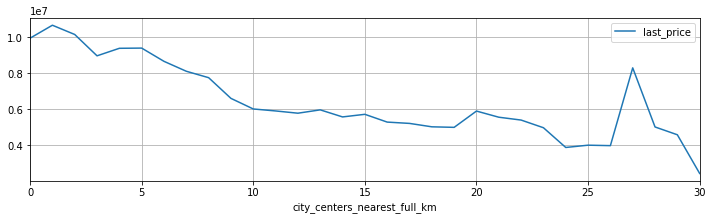

In [89]:
nearest_to_price_def.plot(grid=True, figsize=(12, 3))
#график зависимости средней стоимости квартиры от её удаления от центра города

Исходя из полученного графика, центр города можно определить как область на удалении до 10 км от собственно географической точки, принятой за центр. В диапазоне до 10 км средняя стоимость значительно зависит от удаления, естественно самые дорогие квартиры находятся на минимальном удалении от центра, далее цена начинает понижаться, а после удаления в 10 км и более изменение средней цены незначительно, вероятно этот фактор удаления от центра в этой зоне не оказывает или оказывает минимальное воздействие на среднюю стоимость квартиры.

### Изучение факторов и степени их влияния на стоимость сегмента квартир, находящихся в центре населенного пункта на примере Санкт-Петербурга.

В предыдушем шаге исследования было установлено, что для Санкт-Петербурга область центра определяется удалением до 10 км собственно от географического центра. Для исследования выделим квартиры находящиеся в центре и остальных локациях в отдельные таблицы. 

Для этого введем в таплицу признак принадлежности к центру Санкт-Петербурга.

In [90]:
df_sort['SPb_centre'] = df_sort.apply(lambda x: 'centre' if 
                                      (x['city_centers_nearest_full_km'] <=10 and x['locality_name'] == "Санкт-Петербург")
                                      else 'other_locations',
                                      axis=1).reset_index(drop=True)

In [91]:
df_spb_center = df_sort.query('SPb_centre == "centre"').reset_index(drop=True)
df_other_loc = df_sort.query('SPb_centre == "other_locations"').reset_index(drop=True)

Установим степень влияния на стоимость квартиры в центре различных факторов:  площади, числа комнат, этажа (первого или последнего), удалённости от центра; от даты размещения: дня недели, месяца и года. Для изучения зависимостей будем использовать диаграммы разброса и графики, построенные на основании сводных таблиц по медианным значениям цены для зависимостей от тех параметров, исследуемый диапазон которых узок (количество комнат, тип этажа, дни, месяцы годы)


#### Сравнительное исследование квартир по общей площади 'total_area'

In [92]:
def describe_spb_all(col): #функция описания и сравнения характеристик квартир СПб и остального предложения
    print('SpB_centre:')
    print(df_spb_center[col].describe())
    print()
    print('Other_locations:')
    print(df_other_loc[col].describe())
    print()
    
    plt.figure(figsize=(15,4))
    sns.boxplot(data=pd.DataFrame({'df_other_loc':df_other_loc[col], 'df_spb_center':df_spb_center[col]}), orient ='h')
    plt.xlabel(col)
    plt.grid()
    plt.show()
    
    plt.figure(figsize=(15,4))
    sns.histplot(df_other_loc[col], alpha = 0.5, label='other_locality_'+col, element='step')
    sns.histplot(df_spb_center[col], alpha = 0.3, label='spb_center_'+col, element='step')
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()

SpB_centre:
count    4759.000000
mean       70.539655
std        31.670966
min        20.000000
25%        46.000000
50%        64.700000
75%        86.450000
max       248.000000
Name: total_area, dtype: float64

Other_locations:
count    17827.000000
mean        53.255184
std         20.328208
min         20.000000
25%         38.710000
50%         48.300000
75%         62.600000
max        250.000000
Name: total_area, dtype: float64



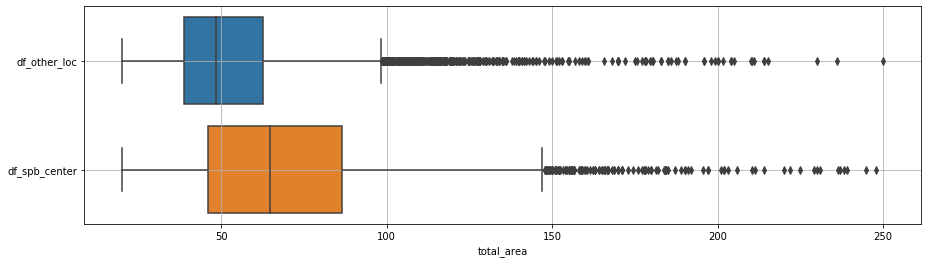

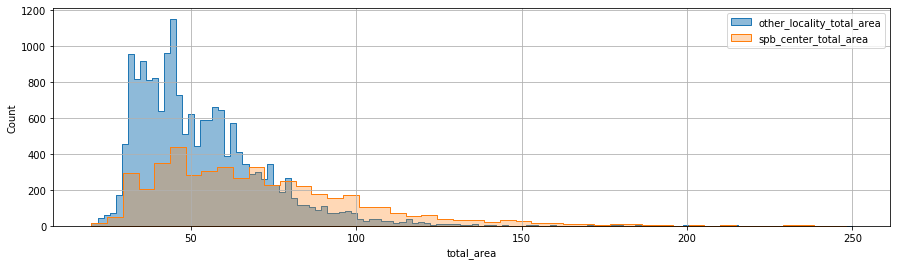

In [93]:
describe_spb_all('total_area')

Профиль гистограммы распределения кваритир по общей площади в центре Санкт-Петербурга примерно повторяет профиль аналогичной гистограммы для  остальных объектов недвижимости. В ней можно также выделить 4 пика: это площади в диапазонах 30-40 м2, 40-50 м2, 50-60 м2 и 60-70 м2. В диапазоне площадей примерно 80-120 м2 половина предложения квартир приходится на центр СПб. Примерно с площадей в 70 м2, количество предложений в центре превышает общее колличество предложений квартир в других локациях. Из диаграмм размаха также видно, что если в центре среднее предложение по площади - это 71 м2, то для остального объема предложений характерна средняя площадь - 53 м2.

#### Сравнительное исследование квартир  по цене 'last_price'

SpB_centre:
count    4.759000e+03
mean     8.252510e+06
std      3.883866e+06
min      1.600000e+06
25%      5.250000e+06
50%      7.380000e+06
75%      1.050000e+07
max      2.000000e+07
Name: last_price, dtype: float64

Other_locations:
count    1.782700e+04
mean     4.691257e+06
std      2.520682e+06
min      4.300000e+05
25%      3.200000e+06
50%      4.200000e+06
75%      5.527500e+06
max      2.000000e+07
Name: last_price, dtype: float64



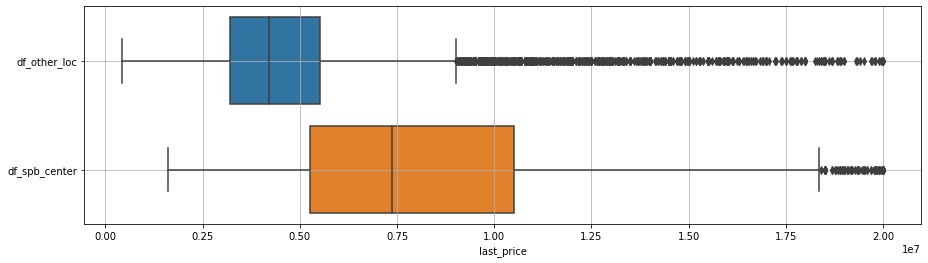

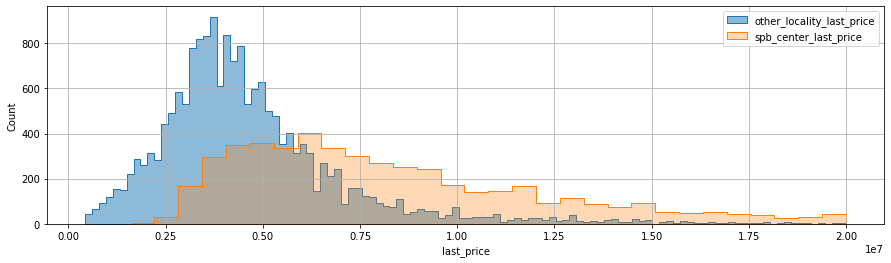

In [94]:
describe_spb_all('last_price')

Гистограмма распределения кваритир по стоимости в центре СПб заметно отличается от профиля гистогаммы остальных квартир Ленинградской области. В центре практически нет квартир дешевле 2,5 млн. руб., максимум предложения приходится на квартиры 6-7,5 млн. руб. В центре естественных образом больше дорогих кварти, объем предложения для центра начинает превышать объем предложений по остальным локациям для квартир стоимостью свыше примерно 6 млн. рублей. Ввиду высокой стоимости квадратного метра медианное и среднее значение стоимости в центре примерно на 3-3,5 млн руб. выш, чем по всем остальным предложениям.   



#### Сравнительное исследование квартир  по количеству комнат  'rooms'

SpB_centre:
count    4759.000000
mean        2.407859
std         1.134997
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: rooms, dtype: float64

Other_locations:
count    17827.000000
mean         1.923599
std          0.888548
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64



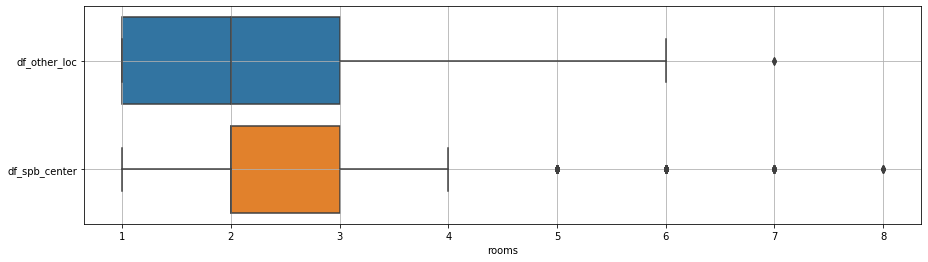

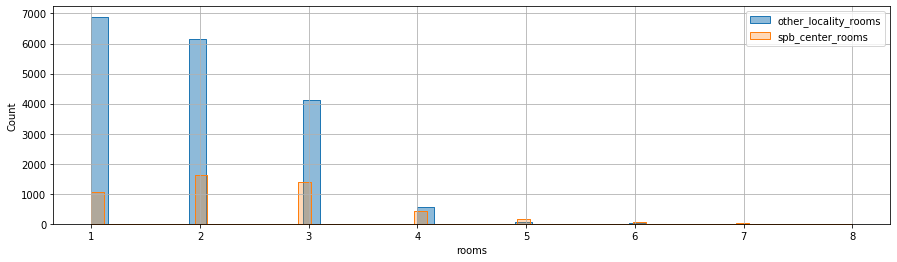

In [95]:
describe_spb_all('rooms')

Гистограмма распределения кваритир по количеству комнат в центре СПб показывает, что для центра более характерными являются квартиры с 2-3 комнатами, в то время как для остального общего объема предложений - это 1-2-3 комнатные квартиры. Также можно отметить, что многокомнатные квартиры (5 и более) в основном характеры для центра.

#### Сравнительное исследование квартир по высоте потолков 'ceiling_height'

SpB_centre:
count    3082.000000
mean        2.933618
std         0.328137
min         2.500000
25%         2.700000
50%         2.950000
75%         3.110000
max         4.000000
Name: ceiling_height, dtype: float64

Other_locations:
count    10696.00000
mean         2.64223
std          0.15956
min          2.50000
25%          2.50000
50%          2.60000
75%          2.70000
max          4.00000
Name: ceiling_height, dtype: float64



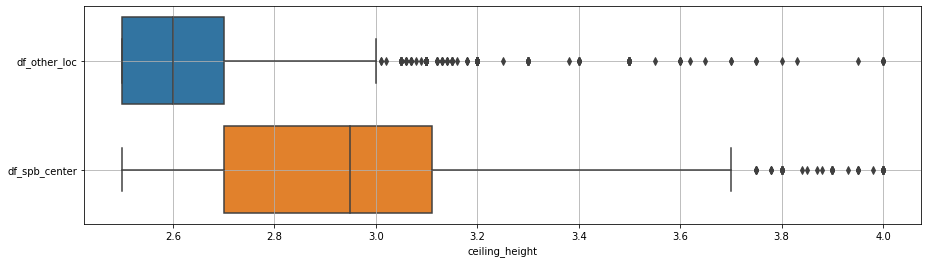

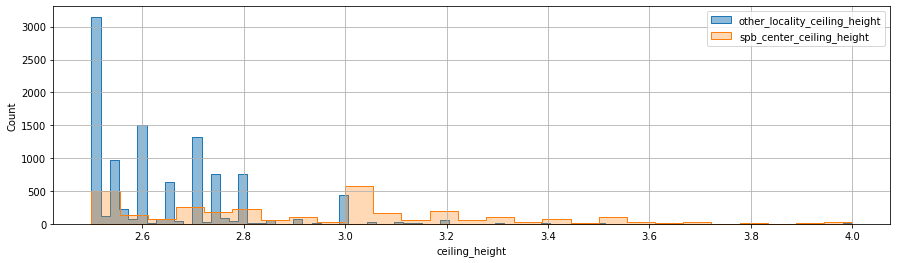

In [96]:
describe_spb_all('ceiling_height')

Гистограмма распределения кваритир по высоте потолков в центре СПб имеет примерно те же пики предложений, что и для остальных квартир. Однако для центра более характерными являются квартиры с высотой полоков 3 м и более. Практически все предложение с высотой потолков от 3 м относится к центру СПб.

#### Сравнительный анализ влияния общей площади на стоимость квартиры

In [97]:
def influence_to_price_spb_all(col):
    print('SpB_centre:')
    print('Коэффициент корреляции: ', df_spb_center.last_price.corr(df_spb_center[col]).round(2))
    print()
    print('Other_locations:')
    print('Коэффициент корреляции: ', df_other_loc.last_price.corr(df_other_loc[col]).round(2))
    
    plt.figure(figsize=(15,4))
    sns.scatterplot(df_other_loc, x=col, y="last_price", alpha = 0.3, label='other_locality_'+col)
    sns.scatterplot(df_spb_center, x=col, y="last_price", alpha = 0.1, label='spb_center_'+col)
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
    
    piv_table_other_loc = df_other_loc.pivot_table(index=col, values='last_price', aggfunc='median').reset_index()
    piv_table_spb_center = df_spb_center.pivot_table(index=col, values='last_price', aggfunc='median').reset_index()
    
    plt.figure(figsize=(15,4))
    sns.barplot(piv_table_other_loc, x=col, y='last_price', alpha = 0.99, label='other_locality_'+col, color='lightblue', width = 0.6)
    sns.barplot(piv_table_spb_center, x=col, y='last_price', alpha = 0.9, label='spb_center_'+col, color='orange', width = 0.3)
    plt.xticks(rotation=45, fontsize=9)
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()

SpB_centre:
Коэффициент корреляции:  0.77

Other_locations:
Коэффициент корреляции:  0.74


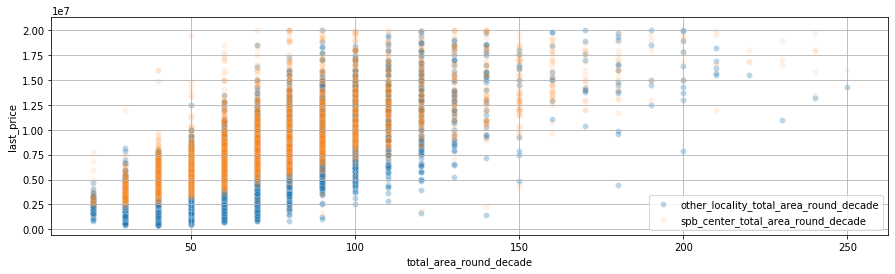

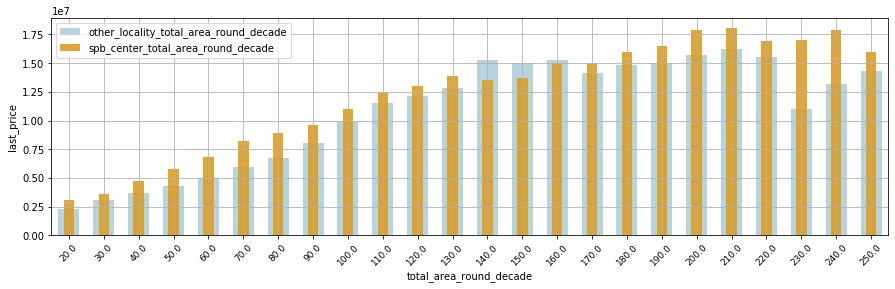

In [98]:
influence_to_price_spb_all('total_area_round_decade')

Коэффициенты корреляции: 0,77 и 0,74 (центр СПб и другие локации соответсвенно) - сильная прямая зависимость .Также как и для всего объема предложений стоимость квартиры в центре имеет прямопропорциональную зависимость от её площади - чем больше площадь, тем больше и цена. Однако диаграмма разброса и график медианных значений цены от площади показывают, что квартиры в центре в области построения смещены в верхнюю часть, так как являются изначально более дорогими. На диаграмме разброса также заметно, что с ростом цен разброс цен, за которую можно купить аналогичные пложади для центра и остальных локаций сильно увеличивается становисся сооизмерим для обейх рассмариваемых частей массива данных.

#### Сравнительный анализ влияния числа комнат на стоимость квартиры

SpB_centre:
Коэффициент корреляции:  0.54

Other_locations:
Коэффициент корреляции:  0.44


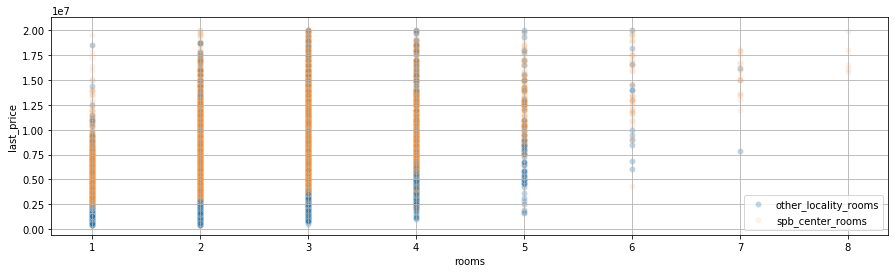

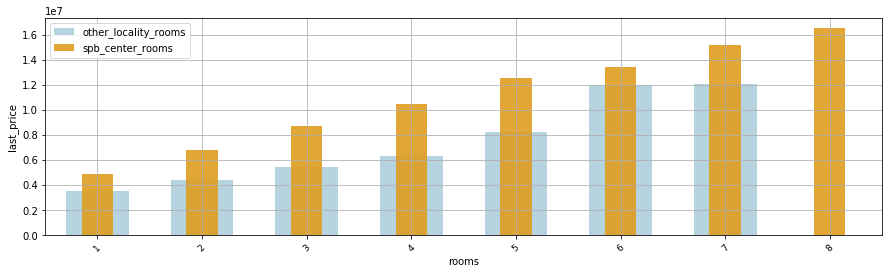

In [99]:
influence_to_price_spb_all('rooms')

Коэффициенты корреляции: 0,54 и 0,44 (центр СПб и другие локации соответсвенно) -  сильная прямая зависимость . Зависимость стоимости квартир от числа комнат также прямопропроциональна, но график зависимости ожидаемо проходит выше. Квартиры с количеством комнат 8 согласно графику характерны исключительно для центра.

#### Сравнительный анализ зависимости цены от типа этажа (первый, последний, другой)

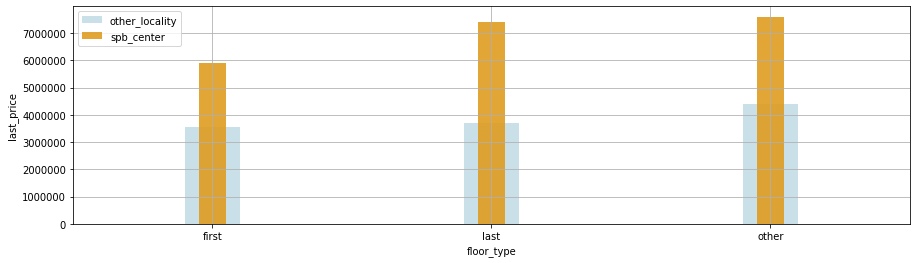

In [100]:
floor_type_median_other_loc = df_other_loc.pivot_table(index='floor_type', values='last_price', aggfunc='median').reset_index()
floor_type_median_spb = df_spb_center.pivot_table(index='floor_type', values='last_price', aggfunc='median').reset_index()
plt.figure(figsize=(15,4))
sns.barplot(floor_type_median_other_loc, x='floor_type', y='last_price', alpha = 0.7, label='other_locality', color='lightblue', width = 0.2)
sns.barplot(floor_type_median_spb, x='floor_type', y='last_price', alpha = 0.9, label='spb_center', color='orange', width = 0.1)
plt.legend(loc='upper left')
plt.grid()
plt.show()

Как видно из графика, зависимости стоимости от типа этажа для СПб, также как и для остального объема продаваемых квартир, самыми дешевыми квартирами являются квартиры на первом этаже. Можно отмеить тот факт что для ценра невилика разница в стоимости квартир на последнем и остальных этажах, в то время как для остального предложения по цене примерно равнозначны квартиры на первом и последнем этажах.

#### Сравнительный анализ зависимости цены от удаления от указанной центральной точки

SpB_centre:
Коэффициент корреляции:  -0.34

Other_locations:
Коэффициент корреляции:  -0.17


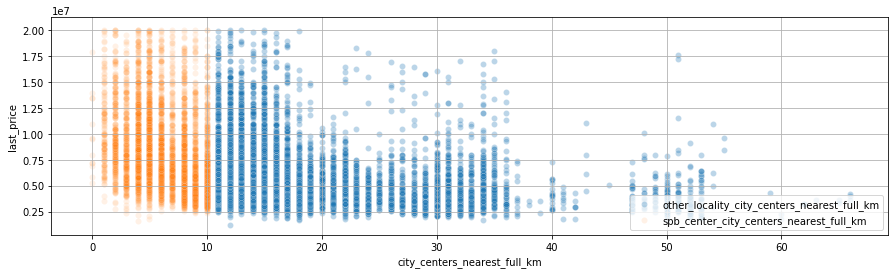

In [101]:
print('SpB_centre:')
print('Коэффициент корреляции: ', df_spb_center.last_price.corr(df_spb_center['city_centers_nearest_full_km']).round(2))
print()
print('Other_locations:')
print('Коэффициент корреляции: ', df_other_loc.last_price.corr(df_other_loc['city_centers_nearest_full_km']).round(2))
    
plt.figure(figsize=(15,4))
sns.scatterplot(df_other_loc, x='city_centers_nearest_full_km', y="last_price", alpha = 0.3, label='other_locality_city_centers_nearest_full_km')
sns.scatterplot(df_spb_center, x='city_centers_nearest_full_km', y="last_price", alpha = 0.1, label='spb_center_city_centers_nearest_full_km')
plt.legend(loc='lower right')
plt.grid()
plt.show()

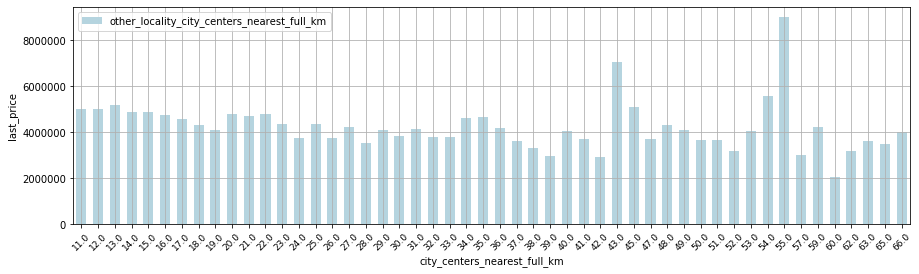

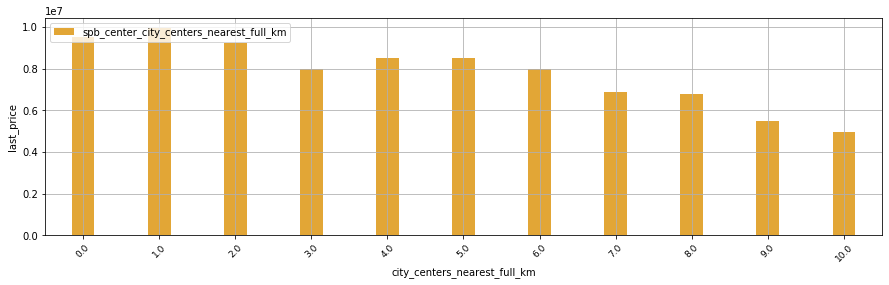

In [102]:
piv_table_other_loc = df_other_loc.pivot_table(index='city_centers_nearest_full_km', values='last_price', aggfunc='median').reset_index()
piv_table_spb_center = df_spb_center.pivot_table(index='city_centers_nearest_full_km', values='last_price', aggfunc='median').reset_index()
    
plt.figure(figsize=(15,4))
sns.barplot(piv_table_other_loc, x='city_centers_nearest_full_km', y='last_price', alpha = 0.99, label='other_locality_city_centers_nearest_full_km', color='lightblue', width = 0.6)
plt.xticks(rotation=45, fontsize=9)
plt.legend(loc='upper left')
plt.grid()
plt.show()
plt.figure(figsize=(15,4))
sns.barplot(piv_table_spb_center, x='city_centers_nearest_full_km', y='last_price', alpha = 0.9, label='spb_center_city_centers_nearest_full_km', color='orange', width = 0.3)
plt.xticks(rotation=45, fontsize=9)
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [103]:
df_other_loc.query('city_centers_nearest_full_km < 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,weekday,month,year,floor_type,living_to_total_area_rat,kitchen_to_total_area_rat,total_area_round_decade,city_centers_nearest_full_km,ceiling_height_m_dm,SPb_centre


Коэффициенты корреляции: -0,34 и -0,17 (центр СПб и другие локации соответсвенно) - характерно наличие обратной слабой зависимости. Исходя из полученных данных можно сделать заключение о том, что точкой центра для населенного пункта для всех объектов выбран центр Санкт-Петербурга, посколько объектов располженных к центру ближе, чем на 10 км и не относящихся с центрально части Санкт-Петербурга не существует.  

#### Сравнительный анлиз зависимости цены квартир от дня недели, в который было опубликовано объявление

SpB_centre:
Коэффициент корреляции:  -0.01

Other_locations:
Коэффициент корреляции:  -0.01


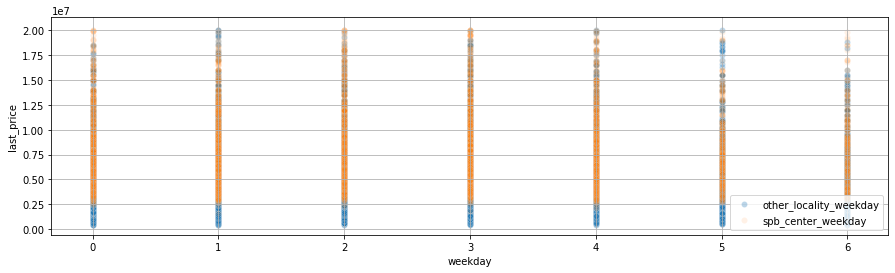

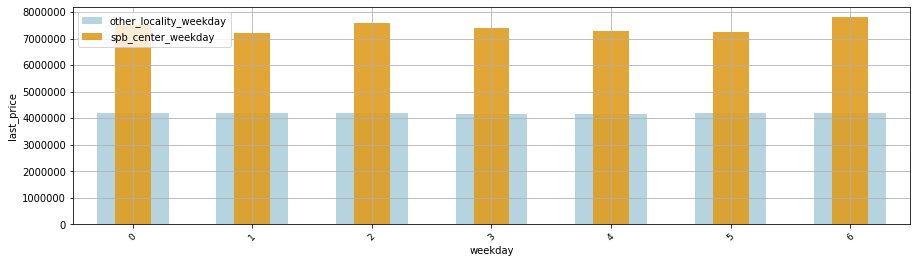

In [104]:
influence_to_price_spb_all('weekday')

Коэффициент корреляции -0,01 - зависимость обратная и слабовыраженная для всех объектов недвижимости, можно утверждать, что она отсутсвует.

#### Сравнительный анализ зависимости цены квартир от месяца, в который было опубликовано объявление

SpB_centre:
Коэффициент корреляции:  0.0

Other_locations:
Коэффициент корреляции:  0.01


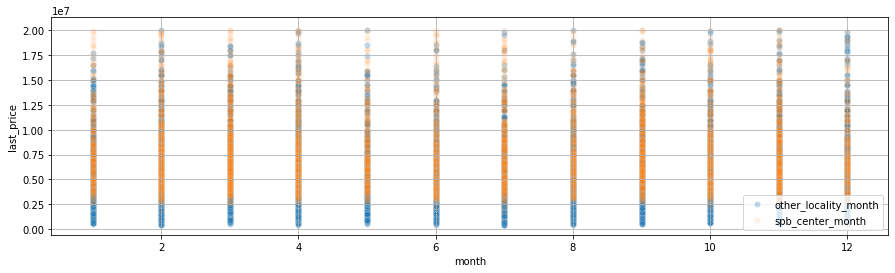

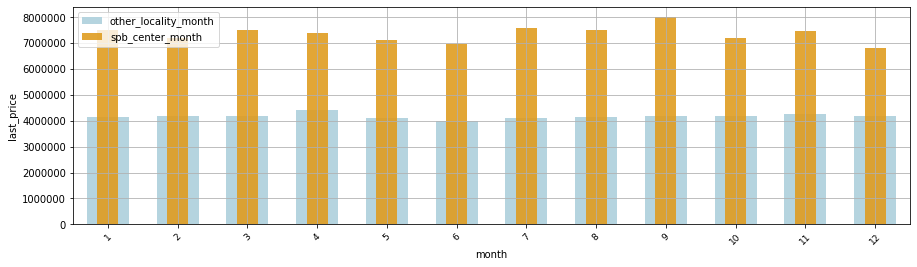

In [105]:
influence_to_price_spb_all('month')

Коэффициенты корреляции: 0,0 и 0,01(центр СПб и другие локации соответсвенно) - зависимость отсутсвует.

#### Сравнительный анализ зависимости цены квартир от года, в который было опубликовано объявление

SpB_centre:
Коэффициент корреляции:  -0.03

Other_locations:
Коэффициент корреляции:  0.02


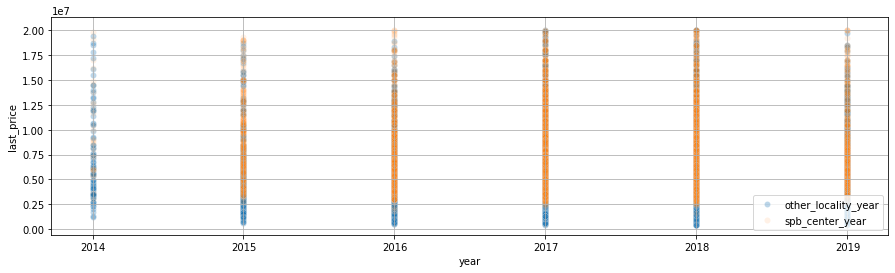

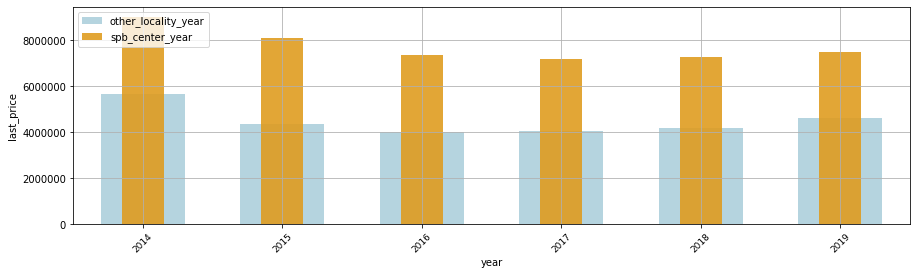

In [106]:
influence_to_price_spb_all('year')

Коэффициенты корреляции -0,03 и 0,02 (для центра СПб и других локаций соответсвенно) - зависимость слабовыраженная, практически отсутсвует. Отмечаются особенности изменения стоимости во времени, характерные и обозначенные для всего предложения вцелом.

In [107]:
 df_sort.SPb_centre

0        other_locations
1        other_locations
2        other_locations
3                 centre
4        other_locations
              ...       
22581             centre
22582    other_locations
22583    other_locations
22584             centre
22585    other_locations
Name: SPb_centre, Length: 22586, dtype: object

### Выводы

Для проведения сравнительного исследования объектов недвижимости центра Санкт-Петербурга и предложений в остальных локациях были определены границы центра населенного пункта на основании изменения стоимость квартир в зависимости от удаления от центра (10 км); таблица с очищенными данными была разделена на 2: первая - объекты недвижимости, расположенные в Санкт-Петербурге на удалении не более 10 км от центра, вторая - остальные объекты. Анализ объектов недвижимости, расположенных в населенных пунктах, отличных от Санкт-Петербурга, указывает на то, что несмотря на этот факт, значения удаленности от центра для них определяются относительно центра  Санкт-Петербурга (таких объектов с удаленностью менее 10 км от центра (предположительно собственного) не существует).


В ходе исследования были проведены:
- Сравнительное исследование распределения числа квартир с учетом их характеристик для центра и других локаций:

  Были получены следующие результаты:
  1. Для центра СПб характерны квартиры большей площади по сравнению с остальными локациями, но в целом их колличество предложений по центру меньше.
  2. Стоимость квартир в центре гораздо выше, ее среднее значение (около 8 млн. руб.) почти в 2 раза больше, чем значение для предложения в других локациях.
  3. Для центра, как и для остальной части предложения, большое распространение получили 1-2-3-4 комнатные квартиры, однако для центра наиболее характерны 2-3 комнатные квартры в продаже, для другого же месторасположения в продаже наиболее распространены 1-комнатные квартиры.
  4. Относительно высоты потолков в центре преобладают квартиры с высотой потолком около 3 м, для других же локаций распространена высота потолков квартир в 2,5 м.
  
  
- Сравнительный анализ влияния характеристик квартир на их стоимость :


  1. Естественным образом наблюдается высокая зависимость стоимость квартир от их общей площади как для центра СПб, так и для остального предложения (коэффициенты корреляции 0,7 и 0,74 соответсвенно). Для аналогичных площадей квартир уровень цен в центре СПб естественно выше уровня цен для других локаций.
  2. Зависимость стоимости квартир от количества комнат достаточно высока, но менее выражена, чем для общей площади: коэффициенты корреляции 0,54 - для центра СПБ, 0,44 - для остальных локаций.
  3. В зависимости стоимости квартиры от типа этажа, на котором она расположена, можно выделить следующие особенности: для центра СПб более дорогими считаются квартиры на средних и последних этажах, уровень цен для них примерно одинаков, квартиры на первых этажах стоят дешевле; для остальных локаций также наиболее дешевыми являются квартиры на первых этажах, однако квартиры на последних этажах по стоимости лишь немного выше стоимости квартир на первых этажах, самые дорогие квартиры также расположены на средних этажах.
  4. В части зависимости стоимости квартир от удаленности от цента (СПб) влияние данного фактора относительно невелико, однако для квартир в центре СПб коэффициент кореляции по модулю в два выше (-0,34), чем для остальных локаций (-0,14), зависиомость обратная.
  5. Как для центра СПб, так и для других локаций, зависимость стоимости квартиры от дня недели, месяца и года, в котором было опубликовано объявление, практически не прослеживается.

## Вывод

База для исследования - массив данных, файл формата '.csv' -  данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 


Таблица включает 23699 строк и 22 столбцa и представлена такими типами данны как object, int64, float64, bool (в зависимсости от описываемого столбца).


По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 
Целью исследования было установление факторов влияния на стоимость объектов недвижимости на основе типичных для рынка значений.


После ознакомления с предоставленными данными, изменением ряда наименований столбцов была произведена их предобработка, которая включала следующие этапы и результаты их выполнения:
1. Исследование, обработка и заполнение пропусков: в 14 столбцах в различном колличестве присутствуют пропуски.  В ходе исследования было устанолена целесообразность заполнения пропусков лишь в столбцах 'balcony' и 'is_apartment', где заополнение пропущенных значений носит очевидный характер. Для других столбцов замена не производилась по следующим причинам: часть столбцов, данные по которым вводятся пользователем - это уникальные характеристики объекта недвижимости, приведение которых к средним параметрам может повлиять на ход исследования и не носит адекватного характера, так как изменение таких характеристик в незначительном диапазоне может резко отразится на решении о покупке; для части столбцов, заполняемых автоматически точно неясен алгоритм формирования конечных значений, что также может привети к неадекватному заполнению пропусков.
2. Приведение данных к актуальным типам: целочисленные по своей сути параметры типа float приведены к типу 'int' - 'floors_total', 'balcony', 'parks_around_3km', 'ponds_around_3km', 'days_exposition'; для столбцов 'airports_nearest', 'city_centers_nearest', 'parks_nearest', 'ponds_nearest' были изменены единицы измерения с метров на километры с округлением до сотен метро; для столбца 'first_day_exposition' изменен формат времени для удобства визуального восприятия а также из-за отсутсвия необходиости в значениях часов-минут-секунд.
3. Проверка на наличие полных дубликатов - дубликатов не выявлено.

Для нужд исследования и формирования выводов в были определены и добавлены в таблицу следующие параметры:
- 'sq_meter_price' - цена квадратного метра, в рублях за квадратный метр (тип int);
- 'weekday', 'month', 'year' - день недели, месяц, год соответственно публикации объявления;
- 'floor_type' - тип этажа (первый, последний, другой)
- 'living_to_total_area_rat' - отношение жилой площади к общей (с округлением до 2 знаков после запятой);
- 'kitchen_to_total_area_rat' - отношение площади кухни к общей (с округлением до 2 знаков после запятой).


В ходе последующего исследования были проанализированы данные в столбцах площади 'total_area', 'living_area', 'kitchen_area' (общей, жилой, кухни), цены объекта недвижимости 'last_price', количества комнат 'rooms', высоты потолков 'ceiling_height', номера этажа и этажности 'floor'/'floors_total'. Были получены описательные статистики, построены диаграммы размаха и гистограммы. Данные были очищены от редких и выбивающихся значений, определены границы нормальных значений, в перечне названий устранен недостаток связанный с написанием поселковых населенных пунктов (названия населенных пунктов в сочетании со словом "поселок" приведены к написанию через "ё" ("посёлок")).

Для последующих исследований была сформирована таблица df_sort, учитывающая все исключенные нехарактерные значения.

Проведено исследование времени продажи кватиры 'days_exposition' в ходе которого установлено, что к быстрым продажам можно отнести продажи в течении 45 дней, затяжные продажы - продажи длительностью от 232 дней (выше среднего и медианного значения), граница нормальных значений времени продаж - 512 дней (около 1,5 лет).

Изучены факторы и степень их влияния на стоимость квартиры, построены их диаграммы разброса и графики:

1. Зависимость цены от площади - коэффициент корреляции: 0,77  - прямая сильновыраженная зависимость.
2. Зависимость цены от количества комнат - коэффициент корреляции: 0,51 - прямая сильная зависимость.
3. Зависимость цены от типа этажа (первый, последний, другой) - самые дешевые квартиры на первом этаже, далее - на последнем, самые дорогие  - на средних этажах.
4. Зависимость цены от удаления от центра - коэффициент корреляции: -0,36 - обратная выраженная зависимость. 
5. Зависимость цены от дня недели, месяца, года в которые было опубликовано объявление - коэффициент корреляции -0,02; 0,01; -0,02 соответсвенно - зависимости практически отсутсвуют.
6. Зависимость цены от высоты потолков - коэффициент корреляции: 0,52 - прямая сильная зависимость.


Проведено исследование стоимости квадратного метра и стомости жилья в 10 населенных пунктов с наибольшим количеством объявлений: самая высокая средняя стоимость квадратного метра недвижимости приходится на Санкт-Петербург (108537 руб/м2), самая низкая - на Выборг (58190 руб/м2).


Проведено сравнительные исследование квартир и анализ зависимости стоимости квартир от различных факторов между квартирами находящимися в центре Санкт - Петербурга и остальным предложением. На основании анализа зависимости стоимости от удаления от центра была определена область, относимая к центру СПБ - 10 км от центральной точки. Исходная таблица была разделена на 2: предложение в центре СПб и остальное предложение.

По результатам сравнительного исследования были получены следующие результаты:

- Для центра СПб характерны квартиры большей площади, но в целом их колличество предложений меньше.
- Стоимость квартир в центре СПБ гораздо выше почти в 2 раза (примерно 8 млн. руб.).
- Для центра наиболее характерны 2-3 комнатные квартры в продаже, для другого же месторасположения в продаже наиболее распространены 1-комнатные квартиры.
- Относительно высоты потолков в центре преобладают квартиры с высотой потолком около 3 м, для других же локаций распространена высота потолков квартир в 2,5 м.
    
Сравнительный анализ влияния характеристик квартир на их стоимость показал следующие результаты:

- Наблюдается высокая зависимость стоимость квартир от их общей площади как для центра СПб, так и для остального предложения (коэффициенты корреляции 0,7 и 0,74 соответсвенно).
- Зависимость стоимости квартир от количества комнат имеет также большую прямую зависимоть: коэффициенты корреляции 0,54 - для центра СПБ, 0,44 - для остальных локаций.
- В зависимости стоимости квартиры от типа этажа, на котором она расположена, можно выделить следующие особенности: для центра СПб более дорогими считаются квартиры на средних и последних этажах, уровень цен для них примерно одинаков, квартиры на первых этажах стоят дешевле; для остальных локаций также наиболее дешевыми являются квартиры на первых этажах, однако квартиры на последних этажах по стоимости лишь немного выше стоимости квартир на первых этажах, самые дорогие квартиры также расположены на средних этажах.
- В части зависимости стоимости квартир от удаленности от цента (СПб) влияние данного фактора относительно невелико, однако для квартир в центре СПб коэффициент кореляции по модулю в два выше (-0,34), чем для остальных локаций (-0,14), зависиомость обратная.
- Как для центра СПб, так и для других локаций, зависимость стоимости квартиры от дня недели, месяца и года, в котором было опубликовано объявление, практически не прослеживается.